In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar                                     # used to get weekday string from datetime objects
from dateutil.relativedelta import relativedelta    # used to add years to datetime objects
import matplotlib.ticker as mtick                   # used to convert axis labels to percentage format

Note: this notebook begins with a (long) data cleaning process, which is summarised before the data analysis and visualisations are produced

### Reading in each dataset

In [2]:
# Setting the range of file names
files = range(21558668, 21558777)
print("File names given: ",len(files))
print("Files expected:    80")

files_in = []
file_list = []
for i in files:
    try:
        file_read = pd.read_csv("data/"+str(i)+".csv")
    except:
        continue
    
    files_in.append(file_read)
    file_list.append(i)
    
print("Total files Read: ",len(files_in)) # Should output 80

File names given:  109
Files expected:    80
Total files Read:  80


#### Removing Unnecessary Columns

To ensure that each dataframe only contains the same columns with data that can be compared, the additional data columns (unlikely to be consistent between each case) and any column other that the expected columns will be removed. Although removing the additional data columns limits the results that can be produced in the final infographic, focusing on the core data will simplify the data wrangling process.

In [3]:
# Checking each dataframe has the required columns (i.e. each expected column is named appropriately)

print('Expected Count: 80 \n')

tot = 0
prob_files = []

# Column names to check
cols = ["PrimaryActivityCode","SecondaryActivityCode","DescriptiveLabel","StartDate","UniBathWeekNo","DayOfWeek","StartTime","EndTime","DurationMins","EnjoymentScore"]

for i,val in enumerate(files_in):
    try:
        # Testing if the required columns can be selected
        sel_cols = val[cols]
        
    except:
        
        # Determining the column(s) that aren't named correctly for the file
        prob_cols = []

        for col in cols:    
            try:
                test = val[col]
            except:
                prob_cols.append(col)
                
        prob_files.append((file_list[i],prob_cols))
        
    else:
        tot += 1
        
print('Count: ',tot)

if len(prob_files) != 0:
    print('Files that failed: \n',[a for (a,b) in prob_files])

Expected Count: 80 

Count:  67
Files that failed: 
 [21558672, 21558693, 21558698, 21558714, 21558717, 21558724, 21558736, 21558744, 21558749, 21558750, 21558751, 21558763, 21558767]


In [4]:
prob_files[:]

[(21558672, ['DescriptiveLabel']),
 (21558693, ['DayOfWeek']),
 (21558698, ['DurationMins']),
 (21558714,
  ['PrimaryActivityCode',
   'SecondaryActivityCode',
   'DescriptiveLabel',
   'StartDate',
   'DayOfWeek',
   'StartTime',
   'EndTime',
   'DurationMins',
   'EnjoymentScore']),
 (21558717, ['EnjoymentScore']),
 (21558724,
  ['PrimaryActivityCode',
   'SecondaryActivityCode',
   'DescriptiveLabel',
   'StartDate',
   'UniBathWeekNo',
   'DayOfWeek',
   'StartTime',
   'EndTime',
   'DurationMins',
   'EnjoymentScore']),
 (21558736, ['DayOfWeek']),
 (21558744, ['StartDate', 'EnjoymentScore']),
 (21558749, ['StartDate']),
 (21558750, ['PrimaryActivityCode', 'SecondaryActivityCode']),
 (21558751, ['UniBathWeekNo']),
 (21558763, ['DayOfWeek']),
 (21558767,
  ['PrimaryActivityCode',
   'SecondaryActivityCode',
   'DescriptiveLabel',
   'StartDate',
   'UniBathWeekNo',
   'DayOfWeek',
   'StartTime',
   'EndTime',
   'EnjoymentScore'])]

##### Renaming the appropriate columns for consistency

In [5]:
# Looking at the inaccuracies for the column names

for (ind,pcols) in prob_files:
    print(ind)
    print(pcols)
    print(list(files_in[file_list.index(ind)].columns))
    print("\n")

21558672
['DescriptiveLabel']
['PrimaryActivityCode', 'SecondaryActivityCode', 'Descriptive Label', 'StartDate', 'UniBathWeekNo', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore', 'Coffees', 'Teas']


21558693
['DayOfWeek']
['Unnamed: 0', 'PrimaryActivityCode', 'SecondaryActivityCode', 'DescriptiveLabel', 'StartDate', 'UniBathWeekNo', 'DayOfWeeks', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore', 'Calorie', 'Degree of concentration']


21558698
['DurationMins']
['Unnamed: 0', 'PrimaryActivityCode', 'SecondaryActivityCode', 'DescriptiveLabel', 'StartDate', 'UniBathWeekNo', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationofTime', 'EnjoymentScore', 'Talked to people', 'Relax your eyes']


21558714
['PrimaryActivityCode', 'SecondaryActivityCode', 'DescriptiveLabel', 'StartDate', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore']
['Primary Activity Code', 'Secondary Activity Code', 'Activity ', 'Start Date', 'UniBathWeekNo', 'Day of Week', 'St

In [6]:
# Classifying the errors in the columns

reasons = [
    (21558672,"space"),(21558693,"rn"),(21558698,"rn"),(21558714,"comb"),(21558717,"rn"),(21558724,"remove"),(21558736,"rn"),
    (21558744,"space"),(21558749,"rn"),(21558750,"rn"),(21558751,"missing"),(21558763,"missing"),(21558767,"comb")
]


Error codes:

space.... column names include spaces between words

rn........... column names can be identified, but need to be mapped individually to correct

comb..... a combination of other errors

remove.. after assessing the nature of the error, it can't be fixed easily, so the data frame should be removed

missing.. the column is missing; will have entries inserted if possible to determine, else will have empty values

##### Correcting the 'space' errors

In [7]:
# Creating dictionaries to correct column names for dataframes identified as "space"
space_corrs = [b for (a,b) in prob_files if a in [a for (a,b) in reasons if b == "space"]]

spaces = [ (21558672,{"Descriptive Label":space_corrs[0][0]}),
           (21558744,{"Start Date":space_corrs[1][0],
                      "Enjoyment Score":space_corrs[1][1]})]

# Correcting the relevant data frames
for (a,b) in spaces:
    files_in[file_list.index(a)].rename(columns=b, inplace=True)

##### Correcting the 'rn' errors

In [8]:
to_fix = [(a,b) for (a,b) in prob_files if a in [a for (a,b) in reasons if b == "rn"]]

# Dictionaries determined by manual inspection (possible due to limited number)
fixes = [{"DayOfWeeks":"DayOfWeek"},
         {"DurationofTime":"DurationMins"},
         {"Enjoyment":"EnjoymentScore"},
         {"DayofWeek":"DayOfWeek"},
         {"SrartDate":"StartDate"},
         {"PrimaryActivityCodes":"PrimaryActivityCode","SecondaryActivityCodes":"SecondaryActivityCode"}]

for i,(a,b) in enumerate(to_fix):
    files_in[file_list.index(a)].rename(columns=fixes[i], inplace=True)

##### Correcting the 'comb' errors

In [9]:
to_fix_comb = [a for (a,b) in prob_files if a in [a for (a,b) in reasons if b == "comb"]]

# Dictionaries determined by manual inspection (possible due to limited number)
comb_fixes = [{"Primary Activity Code":"PrimaryActivityCode",
               "Secondary Activity Code":"SecondaryActivityCode",
               "Activity ":"DescriptiveLabel",
               "Start Date":"StartDate",
               "Day of Week":"DayOfWeek",
               "Start Time":"StartTime",
               "End Time":"EndTime",
               "Duration Mins (longer than 15 mins)":"DurationMins",
               "Enjoyment Score":"EnjoymentScore"},
              {"Activity Code":"PrimaryActivityCode",
               "2nd Activity Code":"SecondaryActivityCode",
               "Activity Description":"DescriptiveLabel",
               "Date":"StartDate",
               "Uni of Bath week":"UniBathWeekNo",
               "Day of week":"DayOfWeek",
               "Start Time":"StartTime",
               "End Time":"EndTime"}]

for i,a in enumerate(to_fix_comb):
    files_in[file_list.index(a)].rename(columns=comb_fixes[i], inplace=True)
    
    if a == 21558767:
        # Adding (empty) column for Enjoyment rating
        files_in[file_list.index(a)]["EnjoymentScore"] = np.nan

##### Correcting the 'missing' errors

In [10]:
to_fix_miss = [a for (a,b) in prob_files if a in [a for (a,b) in reasons if b == "missing"]]
to_fix_miss

for ind in to_fix_miss:
    # for the two cases, the fixes are tailored for the missing column
    
    if ind == 21558751:
        file = files_in[file_list.index(ind)]
        week_nums = []
        
        for i in range(file.shape[0]):
            # Determining the week number from each recorded date
            date = datetime.strptime(file['StartDate'][i],'%d-%m-%Y')
            week_nums.append(date.isocalendar()[1] + 14) #Set for Academic Year 2020/21)
            
        files_in[file_list.index(ind)].insert(4,'UniBathWeekNo', week_nums)
        
    if ind == 21558763:
        file = files_in[file_list.index(ind)]
        week_days = []
        
        for i in range(file.shape[0]):
            # Determining the week day from each recorded date
            date = datetime.strptime(file['StartDate'][i],'%d/%m/%Y')
            week_days.append(calendar.day_name[date.weekday()])
            
        files_in[file_list.index(ind)].insert(5,'DayOfWeek',week_days)

##### Accounting for the 'remove' errors

In [11]:
to_remove = [a for (a,b) in prob_files if a in [a for (a,b) in reasons if b == "remove"]]
to_remove

for ind in to_remove:
    # Removing the dataframe from the list to be joined together
    del files_in[file_list.index(ind)]

    # Removing the dataframe from the reference list
    file_list.remove(ind)

##### Checking column names (post correction)

In [12]:
print('Expected Count: 79 \n')

tot = 0
prob_files2 = []

# Column names to check
cols = ["PrimaryActivityCode","SecondaryActivityCode","DescriptiveLabel","StartDate","UniBathWeekNo","DayOfWeek","StartTime","EndTime","DurationMins","EnjoymentScore"]

for i,val in enumerate(files_in):
    try:
        # Testing if the required columns can be selected
        sel_cols = val[cols]
        
    except:
        
        # Determining the column(s) that aren't named correctly for the file
        prob_cols = []

        for col in cols:    
            try:
                test = val[col]
            except:
                prob_cols.append(col)
                
        prob_files2.append((file_list[i],prob_cols))
        
    else:
        tot += 1
        
print('Count: ',tot)

if len(prob_files2) != 0:
    print('Files that failed: \n',[a for (a,b) in prob_files2])

Expected Count: 79 

Count:  79


Now that each file read in as a dataframe has the required columns, they can be isolated and joined together for further data cleaning to be carried out

In [13]:
# Isolating the specified columns
files_to_join = []
for df in files_in:
    files_to_join.append(df[cols])

df_to_check = pd.concat(files_to_join).reset_index(drop=True)

#### Checking the data in each column

In [14]:
df_to_check.shape

(3113, 10)

In [15]:
df_to_check.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0
2,X893,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0
3,ED152,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0
4,CW982,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0


##### Checking the PrimaryActivityCode

In [16]:
to_check = df_to_check["PrimaryActivityCode"]
code_list = ["ED145","EL642","X893","H179","L418","R523","S801","T695","UD415","PW101","CW982","O733"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    if code not in code_list:
        error_count += 1
        errors.append((i,code))
        
print(error_count)
print(errors)

147
[(3, 'ED152'), (7, 'ED152'), (12, 'ED152'), (15, 'ED152'), (17, 'R253'), (21, 'ED152'), (26, 'ED152'), (31, 'ED152'), (34, 'ED152'), (36, 'R253'), (39, 'ED152'), (41, 'ED152'), (46, 'ED152'), (49, 'ED152'), (51, 'R253'), (202, nan), (241, 'UB415'), (242, 'UB415'), (247, 'UB415'), (254, 'UB415'), (301, 'LE452'), (317, 'DI297'), (330, nan), (331, nan), (332, nan), (333, nan), (334, nan), (335, nan), (608, nan), (609, nan), (610, nan), (611, nan), (612, nan), (613, nan), (614, nan), (615, nan), (616, nan), (617, nan), (618, nan), (619, nan), (620, nan), (621, nan), (622, nan), (623, nan), (624, nan), (625, nan), (626, nan), (627, nan), (628, nan), (629, nan), (630, nan), (631, nan), (632, nan), (800, 'EL162'), (1000, 'ED152'), (1005, 'ED152'), (1012, 'ED152'), (1014, 'R253'), (1020, 'ED152'), (1024, 'ED152'), (1032, 'ED152'), (1034, 'R253'), (1040, 'ED152'), (1044, 'ED152'), (1049, 'ED152'), (1051, 'R253'), (1057, ' X893'), (1076, ' X893'), (1088, ' X893'), (1457, 'ED152'), (1463, 'ED

The main errors that can be seen here are:

- Incorrect codes used (although the correct one can be identified - usually by leading letters used)
- Incorrect codes used (unidentifiable)
- No code provided
- Space included before the code

If a space is included, these can be fixed. If no code is provided

In [17]:
df_to_check.loc[df_to_check["PrimaryActivityCode"].isna()]

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
202,NaN,NaN,USE ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the rows without a given value for the Primary Activity Code, it appears that the vast majority are completely empty entries, so it would make sense to simply remove these rows from the final data frame.

In [18]:
# Removing rows without a Primary Activity Code
df_to_check = df_to_check[df_to_check['PrimaryActivityCode'].notna()]
df_to_check = df_to_check.reset_index(drop=True)

In [19]:
# Checking the PrimaryActivityCode again

to_check = df_to_check["PrimaryActivityCode"]
code_list = ["ED145","EL642","X893","H179","L418","R523","S801","T695","UD415","PW101","CW982","O733"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    if code not in code_list:
        error_count += 1
        errors.append((i,code))
        
print(error_count)
print(errors)

112
[(3, 'ED152'), (7, 'ED152'), (12, 'ED152'), (15, 'ED152'), (17, 'R253'), (21, 'ED152'), (26, 'ED152'), (31, 'ED152'), (34, 'ED152'), (36, 'R253'), (39, 'ED152'), (41, 'ED152'), (46, 'ED152'), (49, 'ED152'), (51, 'R253'), (240, 'UB415'), (241, 'UB415'), (246, 'UB415'), (253, 'UB415'), (300, 'LE452'), (316, 'DI297'), (768, 'EL162'), (968, 'ED152'), (973, 'ED152'), (980, 'ED152'), (982, 'R253'), (988, 'ED152'), (992, 'ED152'), (1000, 'ED152'), (1002, 'R253'), (1008, 'ED152'), (1012, 'ED152'), (1017, 'ED152'), (1019, 'R253'), (1025, ' X893'), (1044, ' X893'), (1056, ' X893'), (1425, 'ED152'), (1431, 'ED152'), (1437, 'ED152'), (1442, 'ED152'), (1445, 'ED152'), (1447, 'R253'), (1451, 'ED152'), (1456, 'ED152'), (1460, 'ED152'), (1466, 'ED152'), (1551, ' S801'), (1556, ' X893'), (1558, ' L418'), (1559, ' H179'), (1561, ' R523'), (1562, ' S801'), (1563, ' L418'), (1568, ' H179'), (1570, ' T695'), (1571, ' L418'), (1573, ' T695'), (1574, ' X893'), (1577, ' H179'), (1579, ' R523'), (1580, ' S

In [20]:
# Splitting the established codes into letters and number components
code_start = [code[:-3] for code in code_list]
code_end   = [code[-3:] for code in code_list]
corrections= []

for (ind,code) in errors:    
    # Correcting 'shopping' (2 instances of use)
    if code == "shopping":
        corrections.append((ind,code,"L418"))
        continue
        
    # Remove initial spaces
    if code != code.strip():
        to_comp = code.strip()
    else:
        to_comp = code
        
    # Check if code is now correct
    if to_comp in code_list:
        corrections.append((ind,code,to_comp))
    else:
        start = to_comp[:-3]
        end = to_comp[-3:]
        
        # Check if code start/end are valid
        if (start in code_start) or (end in code_end):
            # If one isn't valid, then we assume the intented code
            if end not in code_end:
                corrections.append((ind,code,code_list[code_start.index(start)]))
            elif start not in code_start:
                corrections.append((ind,code,code_list[code_end.index(end)]))
                
            # If both are valid, but don't match, then remove row (can't determine intended code)
            elif code_start.index(start) != code_end.index(end):
                corrections.append((ind,code,"drop"))
        # If neither is valid, then remove the row
        else:
            corrections.append((ind,code,"drop"))

##### Looking over 'corrections' before implementing them

In [21]:
df_to_check.shape

(3078, 10)

In [22]:
corrections 

[(3, 'ED152', 'ED145'),
 (7, 'ED152', 'ED145'),
 (12, 'ED152', 'ED145'),
 (15, 'ED152', 'ED145'),
 (17, 'R253', 'R523'),
 (21, 'ED152', 'ED145'),
 (26, 'ED152', 'ED145'),
 (31, 'ED152', 'ED145'),
 (34, 'ED152', 'ED145'),
 (36, 'R253', 'R523'),
 (39, 'ED152', 'ED145'),
 (41, 'ED152', 'ED145'),
 (46, 'ED152', 'ED145'),
 (49, 'ED152', 'ED145'),
 (51, 'R253', 'R523'),
 (240, 'UB415', 'UD415'),
 (241, 'UB415', 'UD415'),
 (246, 'UB415', 'UD415'),
 (253, 'UB415', 'UD415'),
 (300, 'LE452', 'drop'),
 (316, 'DI297', 'drop'),
 (768, 'EL162', 'EL642'),
 (968, 'ED152', 'ED145'),
 (973, 'ED152', 'ED145'),
 (980, 'ED152', 'ED145'),
 (982, 'R253', 'R523'),
 (988, 'ED152', 'ED145'),
 (992, 'ED152', 'ED145'),
 (1000, 'ED152', 'ED145'),
 (1002, 'R253', 'R523'),
 (1008, 'ED152', 'ED145'),
 (1012, 'ED152', 'ED145'),
 (1017, 'ED152', 'ED145'),
 (1019, 'R253', 'R523'),
 (1025, ' X893', 'X893'),
 (1044, ' X893', 'X893'),
 (1056, ' X893', 'X893'),
 (1425, 'ED152', 'ED145'),
 (1431, 'ED152', 'ED145'),
 (1437, '

In [23]:
# Change the index to evaluate the overall entry (especially for those identified to be dropped)
df_to_check.iloc[1447]

PrimaryActivityCode                R253
SecondaryActivityCode                  
DescriptiveLabel         Reading a Book
StartDate                    2021-03-03
UniBathWeekNo                        23
DayOfWeek                     Wednesday
StartTime                         16:15
EndTime                           16:45
DurationMins                         30
EnjoymentScore                        2
Name: 1447, dtype: object

In [24]:
# Making the replacements specified in the 'corrections' variable
for subs in [(a,b,c) for (a,b,c) in corrections if c != "drop"]:
    df_to_check.loc[subs[0],"PrimaryActivityCode"] = subs[2]
    
# Dropping the specified rows
df_to_check = df_to_check.drop([a for (a,b,c) in corrections if c == "drop"])
df_to_check = df_to_check.reset_index(drop=True)

In [25]:
# Final Check on the PrimaryActivityCode

to_check = df_to_check["PrimaryActivityCode"]
code_list = ["ED145","EL642","X893","H179","L418","R523","S801","T695","UD415","PW101","CW982","O733"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    if code not in code_list:
        error_count += 1
        errors.append((i,code))

if len(errors) != 0:
    print(error_count)
    print(errors)
else:
    print("No errors found")

No errors found


##### Checking the Secondary Activity Code

In [26]:
to_check = df_to_check["SecondaryActivityCode"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    if (code not in code_list):
        error_count += 1
        errors.append((i,code))
        
# Accounting for NaNs being allowed
edits = []
for j,(i,code) in enumerate(errors):
    if type(code) == float and np.isnan(code):
        error_count -= 1
        edits.append(j)
        
for index in sorted(edits, reverse=True):
    del errors[index]
              
print(error_count)
print(errors)

285
[(0, ' '), (1, ' '), (3, ' '), (4, ' '), (5, ' '), (6, ' '), (10, ' '), (11, ' '), (13, ' '), (14, ' '), (16, ' '), (17, ' '), (18, ' '), (19, ' '), (21, ' '), (22, ' '), (24, ' '), (26, ' '), (27, ' '), (28, ' '), (31, ' '), (32, ' '), (33, ' '), (35, ' '), (36, ' '), (37, ' '), (38, ' '), (39, ' '), (43, ' '), (44, ' '), (45, ' '), (47, ' '), (48, ' '), (50, ' '), (51, ' '), (90, 'SA114'), (96, 'SA151'), (103, 'SA114'), (298, ' '), (299, ' '), (300, ' '), (304, ' '), (305, ' '), (307, ' '), (308, ' '), (309, ' '), (314, ' '), (316, ' '), (317, ' '), (318, ' '), (319, ' '), (323, ' '), (324, ' '), (326, ' '), (531, 'OTH'), (532, 'ESS'), (533, 'OTH'), (534, 'ESS'), (535, 'PRO'), (536, 'OTH'), (537, 'PRO'), (538, 'ESS'), (539, 'PRO'), (540, 'ENT'), (541, 'OTH'), (542, 'ESS'), (543, 'ESS'), (544, 'PRO'), (545, 'ENT'), (546, 'ESS'), (547, 'OTH'), (548, 'ESS'), (549, 'ENT'), (550, 'OTH'), (551, 'PRO'), (552, 'OTH'), (553, 'ESS'), (554, 'PRO'), (555, 'ENT'), (556, 'ESS'), (557, 'OTH'), 

In [27]:
# Investigating individual rows
len(df_to_check["SecondaryActivityCode"].iloc[300])

1

The errors in the Secondary Activity Code column can be characterised by:

- Empty string
- Incorrect String (intended code not identifiable)
- Incorrect String (intended code is identifiable)
- Space included at start of code

In the first two cases, the easy fix would be to replace the entries with NaNs. The final two cases will be corrected appropriately

In [28]:
corrections = []

for (ind, code) in errors:
    # Empty String
    if code == " ":
        corrections.append((ind,code,np.nan))
        continue
    
    # Remove initial spaces
    if code != code.strip():
        to_comp = code.strip()
    else:
        to_comp = code
        
    # Check if code is now correct
    if to_comp in code_list:
        corrections.append((ind,code,to_comp))
    else:
        start = to_comp[:-3]
        end = to_comp[-3:]
        
        # Check if code start/end are valid
        if (start in code_start) or (end in code_end):
            # If one isn't valid, then we assume the intented code
            if end not in code_end:
                corrections.append((ind,code,code_list[code_start.index(start)]))
            elif start not in code_start:
                corrections.append((ind,code,code_list[code_end.index(end)]))
                
            # If both are valid, but don't match, then remove row (can't determine intended code)
            elif code_start.index(start) != code_end.index(end):
                corrections.append((ind,code,np.nan))
        # If neither is valid, then remove the row
        else:
            corrections.append((ind,code,np.nan))
            
corrections # displayed to assess corrections before they are implemented

[(0, ' ', nan),
 (1, ' ', nan),
 (3, ' ', nan),
 (4, ' ', nan),
 (5, ' ', nan),
 (6, ' ', nan),
 (10, ' ', nan),
 (11, ' ', nan),
 (13, ' ', nan),
 (14, ' ', nan),
 (16, ' ', nan),
 (17, ' ', nan),
 (18, ' ', nan),
 (19, ' ', nan),
 (21, ' ', nan),
 (22, ' ', nan),
 (24, ' ', nan),
 (26, ' ', nan),
 (27, ' ', nan),
 (28, ' ', nan),
 (31, ' ', nan),
 (32, ' ', nan),
 (33, ' ', nan),
 (35, ' ', nan),
 (36, ' ', nan),
 (37, ' ', nan),
 (38, ' ', nan),
 (39, ' ', nan),
 (43, ' ', nan),
 (44, ' ', nan),
 (45, ' ', nan),
 (47, ' ', nan),
 (48, ' ', nan),
 (50, ' ', nan),
 (51, ' ', nan),
 (90, 'SA114', nan),
 (96, 'SA151', nan),
 (103, 'SA114', nan),
 (298, ' ', nan),
 (299, ' ', nan),
 (300, ' ', nan),
 (304, ' ', nan),
 (305, ' ', nan),
 (307, ' ', nan),
 (308, ' ', nan),
 (309, ' ', nan),
 (314, ' ', nan),
 (316, ' ', nan),
 (317, ' ', nan),
 (318, ' ', nan),
 (319, ' ', nan),
 (323, ' ', nan),
 (324, ' ', nan),
 (326, ' ', nan),
 (531, 'OTH', nan),
 (532, 'ESS', nan),
 (533, 'OTH', nan),

In [29]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in corrections]:
    df_to_check.loc[subs[0],"SecondaryActivityCode"] = subs[1]

In [30]:
# Final Check on Secondary Activity Codes
to_check = df_to_check["SecondaryActivityCode"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    if (code not in code_list):
        error_count += 1
        errors.append((i,code))
        
# Accounting for NaNs being allowed
edits = []
for j,(i,code) in enumerate(errors):
    if type(code) == float and np.isnan(code):
        error_count -= 1
        edits.append(j)
        
for index in sorted(edits, reverse=True):
    del errors[index]
    
if len(errors) != 0:
    print(error_count)
    print(errors)
else:
    print("No errors found")

No errors found


#### Checking the Start Date column

In [31]:
to_check = df_to_check["StartDate"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    try:
        date = datetime.strptime(code,'%d/%m/%y')
    except:
        error_count += 1
        errors.append((i,code))
    
if len(errors) != 0:
    print(error_count)
    print(errors)
else:
    print("No errors found")

2417
[(0, '08/03/2021'), (1, '08/03/2021'), (2, '08/03/2021'), (3, '08/03/2021'), (4, '08/03/2021'), (5, '08/03/2021'), (6, '08/03/2021'), (7, '08/03/2021'), (8, '08/03/2021'), (9, '08/03/2021'), (10, '08/03/2021'), (11, '08/03/2021'), (12, '08/03/2021'), (13, '08/03/2021'), (14, '08/03/2021'), (15, '08/03/2021'), (16, '08/03/2021'), (17, '08/03/2021'), (18, '09/03/2021'), (19, '09/03/2021'), (20, '09/03/2021'), (21, '09/03/2021'), (22, '09/03/2021'), (23, '09/03/2021'), (24, '09/03/2021'), (25, '09/03/2021'), (26, '09/03/2021'), (27, '09/03/2021'), (28, '09/03/2021'), (29, '09/03/2021'), (30, '09/03/2021'), (31, '09/03/2021'), (32, '09/03/2021'), (33, '09/03/2021'), (34, '09/03/2021'), (35, '09/03/2021'), (36, '09/03/2021'), (37, '10/03/2021'), (38, '10/03/2021'), (39, '10/03/2021'), (40, '10/03/2021'), (41, '10/03/2021'), (42, '10/03/2021'), (43, '10/03/2021'), (44, '10/03/2021'), (45, '10/03/2021'), (46, '10/03/2021'), (47, '10/03/2021'), (48, '10/03/2021'), (49, '10/03/2021'), (50,

The errors seen above are the dates that don't conform to the format of DD/MM/YY. When working with the dates, we'd want to have a consistent format throughout, so the next block will carry out the conversions. The formats that are identified by observation are seen below:

- DD/MM/YYYY
- YYYY-MM-DD
- DD-MM-YYYY
- YYYY/MM/DD

During this, the possibility of incorrect dates are considered in the next block

In [32]:
corrections = []
set_date = datetime.strptime("19/02/21",'%d/%m/%y')
due_date = datetime.strptime("13/03/21",'%d/%m/%y')
wrong_date = []

for (ind,code) in errors:
    
    # DD/MM/YYYY
    try:
        date = datetime.strptime(code,'%d/%m/%Y')
    except:
        pass
    else:
        date = datetime.strptime(code,'%d/%m/%Y')
        
        # Making sure day/month aren't read incorrectly by comparing to the due and set dates for the CW
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%m/%d/%Y')
            if date < set_date or date > due_date:
                # Reaching this point implies that the date is wrong 
                wrong_date.append((ind,code,'%d/%m/%Y'))
            
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
    
    # YYYY/MM/DD
    try:
        date = datetime.strptime(code,'%Y/%m/%d')
    except:
        pass
    else:
        date = datetime.strptime(code,'%Y/%m/%d')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%Y/%d/%m')
            if date < set_date or date > due_date:
                wrong_date.append((ind,code,'%Y/%m/%d'))
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
    
    # YYYY-MM-DD
    try:
        date = datetime.strptime(code,'%Y-%m-%d')
    except:
        pass
    else:
        date = datetime.strptime(code,'%Y-%m-%d')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%Y-%d-%m')
            if date < set_date or date > due_date:
                wrong_date.append((ind,code,'%Y-%m-%d'))
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
        
    # DD-MM-YYYY
    try:
        date = datetime.strptime(code,'%d-%m-%Y')
    except:
        pass
    else:
        date = datetime.strptime(code,'%d-%m-%Y')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%m-%d-%Y')
            if date < set_date or date > due_date:
                wrong_date.append((ind,code,'%d-%m-%Y'))
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
        

print("Errors      -",len(errors))
print("Corrections -",len(corrections))
corrections

Errors      - 2417
Corrections - 2417


[(0, '08/03/2021', '08/03/21'),
 (1, '08/03/2021', '08/03/21'),
 (2, '08/03/2021', '08/03/21'),
 (3, '08/03/2021', '08/03/21'),
 (4, '08/03/2021', '08/03/21'),
 (5, '08/03/2021', '08/03/21'),
 (6, '08/03/2021', '08/03/21'),
 (7, '08/03/2021', '08/03/21'),
 (8, '08/03/2021', '08/03/21'),
 (9, '08/03/2021', '08/03/21'),
 (10, '08/03/2021', '08/03/21'),
 (11, '08/03/2021', '08/03/21'),
 (12, '08/03/2021', '08/03/21'),
 (13, '08/03/2021', '08/03/21'),
 (14, '08/03/2021', '08/03/21'),
 (15, '08/03/2021', '08/03/21'),
 (16, '08/03/2021', '08/03/21'),
 (17, '08/03/2021', '08/03/21'),
 (18, '09/03/2021', '09/03/21'),
 (19, '09/03/2021', '09/03/21'),
 (20, '09/03/2021', '09/03/21'),
 (21, '09/03/2021', '09/03/21'),
 (22, '09/03/2021', '09/03/21'),
 (23, '09/03/2021', '09/03/21'),
 (24, '09/03/2021', '09/03/21'),
 (25, '09/03/2021', '09/03/21'),
 (26, '09/03/2021', '09/03/21'),
 (27, '09/03/2021', '09/03/21'),
 (28, '09/03/2021', '09/03/21'),
 (29, '09/03/2021', '09/03/21'),
 (30, '09/03/2021', 

In [33]:
wrong_date # Most of these appear to simply have the wrong year (will be corrected); the rest will be removed

[(1118, '2020-03-07', '%Y-%m-%d'),
 (1119, '2020-03-07', '%Y-%m-%d'),
 (1120, '2020-03-07', '%Y-%m-%d'),
 (1121, '2020-03-07', '%Y-%m-%d'),
 (1122, '2020-03-07', '%Y-%m-%d'),
 (1123, '2020-03-07', '%Y-%m-%d'),
 (1124, '2020-03-07', '%Y-%m-%d'),
 (1125, '2020-03-07', '%Y-%m-%d'),
 (1126, '2020-03-07', '%Y-%m-%d'),
 (1127, '2020-03-07', '%Y-%m-%d'),
 (1128, '2020-03-07', '%Y-%m-%d'),
 (1129, '2020-03-07', '%Y-%m-%d'),
 (1130, '2020-03-07', '%Y-%m-%d'),
 (1131, '2020-03-07', '%Y-%m-%d'),
 (1132, '2020-03-08', '%Y-%m-%d'),
 (1133, '2020-03-08', '%Y-%m-%d'),
 (1134, '2020-03-08', '%Y-%m-%d'),
 (1135, '2020-03-08', '%Y-%m-%d'),
 (1136, '2020-03-08', '%Y-%m-%d'),
 (1137, '2020-03-08', '%Y-%m-%d'),
 (1138, '2020-03-08', '%Y-%m-%d'),
 (1139, '2020-03-08', '%Y-%m-%d'),
 (1140, '2020-03-08', '%Y-%m-%d'),
 (1141, '2020-03-08', '%Y-%m-%d'),
 (1142, '2020-03-08', '%Y-%m-%d'),
 (1143, '2020-03-08', '%Y-%m-%d'),
 (1144, '2020-03-08', '%Y-%m-%d'),
 (1145, '2020-03-08', '%Y-%m-%d'),
 (1146, '2020-03-08'

In [34]:
date_corrections = []

for (ind,date,pat) in wrong_date:
    date_t = datetime.strptime(date,pat)
    
    # Account for errors in dates that show obvious errors
    if date_t.year == 2020:
        date_t = date_t + relativedelta(years=1)
        
    if date_t > set_date and date_t < due_date:
        date_corrections.append((ind,date,date_t.strftime('%d/%m/%y')))
    else:
        date_corrections.append((ind,date,"remove"))
        
date_corrections    

[(1118, '2020-03-07', '07/03/21'),
 (1119, '2020-03-07', '07/03/21'),
 (1120, '2020-03-07', '07/03/21'),
 (1121, '2020-03-07', '07/03/21'),
 (1122, '2020-03-07', '07/03/21'),
 (1123, '2020-03-07', '07/03/21'),
 (1124, '2020-03-07', '07/03/21'),
 (1125, '2020-03-07', '07/03/21'),
 (1126, '2020-03-07', '07/03/21'),
 (1127, '2020-03-07', '07/03/21'),
 (1128, '2020-03-07', '07/03/21'),
 (1129, '2020-03-07', '07/03/21'),
 (1130, '2020-03-07', '07/03/21'),
 (1131, '2020-03-07', '07/03/21'),
 (1132, '2020-03-08', '08/03/21'),
 (1133, '2020-03-08', '08/03/21'),
 (1134, '2020-03-08', '08/03/21'),
 (1135, '2020-03-08', '08/03/21'),
 (1136, '2020-03-08', '08/03/21'),
 (1137, '2020-03-08', '08/03/21'),
 (1138, '2020-03-08', '08/03/21'),
 (1139, '2020-03-08', '08/03/21'),
 (1140, '2020-03-08', '08/03/21'),
 (1141, '2020-03-08', '08/03/21'),
 (1142, '2020-03-08', '08/03/21'),
 (1143, '2020-03-08', '08/03/21'),
 (1144, '2020-03-08', '08/03/21'),
 (1145, '2020-03-08', '08/03/21'),
 (1146, '2020-03-08'

In [35]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in date_corrections if c != "remove"]:
    df_to_check.loc[subs[0],"StartDate"] = subs[1]
    
# Dropping the specified rows
df_to_check = df_to_check.drop([a for (a,b,c) in date_corrections if c == "remove"])
df_to_check = df_to_check.reset_index(drop=True)

In [36]:
df_to_check["StartDate"].iloc[1118]

'07/03/21'

In [37]:
# Carrying out this step again (with incorrect dates accounted for)
to_check = df_to_check["StartDate"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    try:
        date = datetime.strptime(code,'%d/%m/%y')
    except:
        error_count += 1
        errors.append((i,code))
    
if len(errors) != 0:
    print(error_count)
    print(errors)
else:
    print("No errors found")

2292
[(0, '08/03/2021'), (1, '08/03/2021'), (2, '08/03/2021'), (3, '08/03/2021'), (4, '08/03/2021'), (5, '08/03/2021'), (6, '08/03/2021'), (7, '08/03/2021'), (8, '08/03/2021'), (9, '08/03/2021'), (10, '08/03/2021'), (11, '08/03/2021'), (12, '08/03/2021'), (13, '08/03/2021'), (14, '08/03/2021'), (15, '08/03/2021'), (16, '08/03/2021'), (17, '08/03/2021'), (18, '09/03/2021'), (19, '09/03/2021'), (20, '09/03/2021'), (21, '09/03/2021'), (22, '09/03/2021'), (23, '09/03/2021'), (24, '09/03/2021'), (25, '09/03/2021'), (26, '09/03/2021'), (27, '09/03/2021'), (28, '09/03/2021'), (29, '09/03/2021'), (30, '09/03/2021'), (31, '09/03/2021'), (32, '09/03/2021'), (33, '09/03/2021'), (34, '09/03/2021'), (35, '09/03/2021'), (36, '09/03/2021'), (37, '10/03/2021'), (38, '10/03/2021'), (39, '10/03/2021'), (40, '10/03/2021'), (41, '10/03/2021'), (42, '10/03/2021'), (43, '10/03/2021'), (44, '10/03/2021'), (45, '10/03/2021'), (46, '10/03/2021'), (47, '10/03/2021'), (48, '10/03/2021'), (49, '10/03/2021'), (50,

In [38]:
corrections = []
wrong_date = []

for (ind,code) in errors:
    
    # DD/MM/YYYY
    try:
        date = datetime.strptime(code,'%d/%m/%Y')
    except:
        pass
    else:
        date = datetime.strptime(code,'%d/%m/%Y')
        
        # Making sure day/month aren't read incorrectly by comparing to the due and set dates for the CW
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%m/%d/%Y')
            
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
    
    # YYYY/MM/DD
    try:
        date = datetime.strptime(code,'%Y/%m/%d')
    except:
        pass
    else:
        date = datetime.strptime(code,'%Y/%m/%d')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%Y/%d/%m')
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
    
    # YYYY-MM-DD
    try:
        date = datetime.strptime(code,'%Y-%m-%d')
    except:
        pass
    else:
        date = datetime.strptime(code,'%Y-%m-%d')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%Y-%d-%m')
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
        
    # DD-MM-YYYY
    try:
        date = datetime.strptime(code,'%d-%m-%Y')
    except:
        pass
    else:
        date = datetime.strptime(code,'%d-%m-%Y')
        if date < set_date or date > due_date:
            date = datetime.strptime(code,'%m-%d-%Y')
                
        corrections.append((ind,code,date.strftime('%d/%m/%y')))
        continue
        

print("Errors      -",len(errors))
print("Corrections -",len(corrections))
# corrections

Errors      - 2292
Corrections - 2292


We can see that every error has been assigned a correction now, which appears to be corrected upon inspection. These will now be implemented below

In [39]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in corrections]:
    df_to_check.loc[subs[0],"StartDate"] = subs[1]

In [40]:
# Final Check on Start Date column
to_check = df_to_check["StartDate"]

error_count = 0
errors = []

for i,code in enumerate(to_check):
    try:
        date = datetime.strptime(code,'%d/%m/%y')
    except:
        error_count += 1
        errors.append((i,code))
    
if len(errors) != 0:
    print(error_count)
    print(errors)
else:
    print("No errors found")

No errors found


##### Checking each Week Number and Day is correct

In [41]:
week_error_count = 0
week_errors = []

day_error_count = 0
day_errors = []

for i in range(df_to_check.shape[0]):
    week_num = df_to_check["UniBathWeekNo"].iloc[i]
    week_day = df_to_check["DayOfWeek"].iloc[i]
    
    date = datetime.strptime(df_to_check["StartDate"].iloc[i],'%d/%m/%y')
    
    check_num = date.isocalendar()[1] + 14
    check_day = calendar.day_name[date.weekday()]
    
    if week_num != check_num:
        week_error_count += 1
        week_errors.append((i,week_num,check_num))
        
    if week_day != check_day:
        day_error_count += 1
        day_errors.append((i,week_day,check_day))
        
if week_error_count != 0:
    print("Week Errors -",week_error_count)
    print(week_errors)
else:
    print("No Errors Found for Week Number")


Week Errors - 257
[(241, 24.0, 23), (242, 24.0, 23), (243, 24.0, 23), (244, 24.0, 23), (245, 24.0, 23), (246, 24.0, 23), (447, 22.0, 23), (448, 22.0, 23), (449, 22.0, 23), (450, 22.0, 23), (451, 22.0, 23), (452, 22.0, 23), (453, 22.0, 23), (454, 22.0, 23), (455, 22.0, 23), (456, 22.0, 23), (457, 22.0, 23), (458, 22.0, 23), (459, 22.0, 23), (460, 22.0, 23), (461, 22.0, 23), (462, 22.0, 23), (463, 22.0, 23), (464, 22.0, 23), (465, 22.0, 23), (466, 22.0, 23), (467, 22.0, 23), (468, 22.0, 23), (469, 22.0, 23), (470, 22.0, 23), (471, 22.0, 23), (472, 22.0, 23), (473, 22.0, 23), (474, 22.0, 23), (1362, -30.0, 23), (1371, 22.0, 24), (1372, 22.0, 24), (1373, 22.0, 24), (1374, 22.0, 24), (1375, 22.0, 24), (1376, 22.0, 24), (1377, 22.0, 24), (1378, 22.0, 24), (1379, 22.0, 24), (1380, 22.0, 24), (1381, 22.0, 24), (1382, 22.0, 24), (1383, 22.0, 24), (1384, 22.0, 24), (1385, 22.0, 24), (1386, 22.0, 24), (1387, 22.0, 24), (1388, 22.0, 24), (1389, 22.0, 24), (1390, 22.0, 24), (1391, 22.0, 24), (1392,

In [42]:
if day_error_count != 0:
    print("Week Errors -",day_error_count)
    print(day_errors)
else:
    print("No Errors Found for Week Day")

Week Errors - 218
[(599, 2, 'Tuesday'), (600, 2, 'Tuesday'), (601, 2, 'Tuesday'), (602, 2, 'Tuesday'), (603, 2, 'Tuesday'), (604, 2, 'Tuesday'), (605, 2, 'Tuesday'), (606, 2, 'Tuesday'), (607, 2, 'Tuesday'), (608, 2, 'Tuesday'), (609, 2, 'Tuesday'), (610, 6, 'Saturday'), (611, 6, 'Saturday'), (612, 6, 'Saturday'), (613, 6, 'Saturday'), (614, 6, 'Saturday'), (615, 6, 'Saturday'), (616, 6, 'Saturday'), (617, 6, 'Saturday'), (618, 6, 'Saturday'), (619, 6, 'Saturday'), (620, 6, 'Saturday'), (621, 4, 'Thursday'), (622, 4, 'Thursday'), (623, 4, 'Thursday'), (624, 4, 'Thursday'), (625, 4, 'Thursday'), (626, 4, 'Thursday'), (627, 4, 'Thursday'), (628, 4, 'Thursday'), (629, 4, 'Thursday'), (630, 4, 'Thursday'), (631, 4, 'Thursday'), (885, 'Sat', 'Saturday'), (886, 'Sat', 'Saturday'), (887, 'Sat', 'Saturday'), (888, 'Sat', 'Saturday'), (889, 'Sat', 'Saturday'), (890, 'Sat', 'Saturday'), (891, 'Sat', 'Saturday'), (892, 'Sat', 'Saturday'), (893, 'Sat', 'Saturday'), (894, 'Sat', 'Saturday'), (895, 

Looking through the suggested correction for the week day and number for the records with errors the following trends can be seen:

- the majority of errors in the week day are due to simple errors, such as spelling mistakes, blank spaces included, or a different week system (such as day numbers instead of using the names for each day)
- almost all the errors in the week numbers are off by 1, in either the positive or negative direction (with very few cases where the difference was significant). Assuming the date assigned to each row is accurate, the correct week number can be replaced

Overall, after evaluating these suggested corrections, this shows the corrections should implemented

In [43]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in week_errors]:
    df_to_check.loc[subs[0],"UniBathWeekNo"] = subs[1]
    
for subs in [(a,c) for (a,b,c) in day_errors]:
    df_to_check.loc[subs[0],"DayOfWeek"] = subs[1]

In [44]:
# Final check for errors
week_error_count = 0
week_errors = []

day_error_count = 0
day_errors = []

for i in range(df_to_check.shape[0]):
    week_num = df_to_check["UniBathWeekNo"].iloc[i]
    week_day = df_to_check["DayOfWeek"].iloc[i]
    
    date = datetime.strptime(df_to_check["StartDate"].iloc[i],'%d/%m/%y')
    
    check_num = date.isocalendar()[1] + 14
    check_day = calendar.day_name[date.weekday()]
    
    if week_num != check_num:
        week_error_count += 1
        week_errors.append((i,week_num,check_num))
        
    if week_day != check_day:
        day_error_count += 1
        day_errors.append((i,week_day,check_day))
        
if week_error_count != 0:
    print("Week Errors -",week_error_count)
    print(week_errors)
else:
    print("No Errors Found for Week Number")
    
if day_error_count != 0:
    print("Week Errors -",day_error_count)
    print(day_errors)
else:
    print("No Errors Found for Week Day")

No Errors Found for Week Number
No Errors Found for Week Day


##### Checking Start and End Time formats

Firstly, I will identify and remove any rows with missing Start/End times as these are required for any entry (without this information, the duration of the activity can't be determined/could be undermined)

In [45]:
emp_times = []
for i in range(df_to_check.shape[0]):
    start = df_to_check["StartTime"].iloc[i]
    end   = df_to_check["EndTime"].iloc[i]
    
    if type(start) != str:
        emp_times.append(("start",i,start))
        #print(type(start))
        
    if type(end) != str:
        emp_times.append(("end",i,end))
        #print(type(end))

print(emp_times)

[('start', 2493, nan), ('start', 2558, nan), ('end', 2559, nan), ('start', 2565, nan), ('end', 2565, nan), ('start', 2576, nan), ('end', 2576, nan), ('start', 2577, nan), ('end', 2577, nan), ('start', 2579, nan), ('end', 2580, nan), ('start', 2585, nan), ('end', 2585, nan), ('start', 2593, nan), ('end', 2593, nan), ('start', 2596, nan), ('end', 2596, nan), ('start', 2599, nan), ('end', 2599, nan), ('start', 2600, nan), ('end', 2600, nan), ('start', 2601, nan), ('end', 2601, nan), ('start', 2602, nan), ('end', 2603, nan), ('start', 2609, nan), ('end', 2609, nan), ('start', 2619, nan), ('end', 2619, nan), ('start', 2620, nan), ('end', 2620, nan)]


In [46]:
# Removing rows with missing Start/End times
df_to_check = df_to_check.drop(list(set([b for (a,b,c) in emp_times])))
df_to_check = df_to_check.reset_index(drop=True)

In [47]:
start_errors = []
end_errors   = []

for i in range(df_to_check.shape[0]):
    start = df_to_check["StartTime"].iloc[i]
    end   = df_to_check["EndTime"].iloc[i]
    
    # Test StartTime format
    try:
        start_t = datetime.strptime(start,'%H:%M')
    except:
        start_errors.append((i,start))
        
    # Test EndTime format
    try:
        end_t = datetime.strptime(end,'%H:%M')
    except:
        end_errors.append((i,end))
        
if len(start_errors) != 0:
    print("Start Time Errors -",len(start_errors))
    print(start_errors)
else:
    print("No Errors Found for Start Time")
    
if len(end_errors) != 0:
    print("Week Errors -",len(end_errors))
    print(end_errors)
else:
    print("No Errors Found for End Time")

Start Time Errors - 1349
[(254, '00:00:00'), (255, '00:30:00'), (256, '03:15:00'), (257, '11:00:00'), (258, '11:30:00'), (259, '13:00:00'), (260, '13:30:00'), (261, '14:30:00'), (262, '17:15:00'), (263, '18:15:00'), (264, '19:15:00'), (265, '20:15:00'), (266, '21:15:00'), (267, '22:15:00'), (268, '00:00:00'), (269, '00:15:00'), (270, '00:45:00'), (271, '01:15:00'), (272, '02:30:00'), (273, '11:30:00'), (274, '12:15:00'), (275, '13:30:00'), (276, '14:00:00'), (277, '17:15:00'), (278, '18:15:00'), (279, '18:30:00'), (280, '19:00:00'), (281, '19:30:00'), (282, '20:15:00'), (283, '21:15:00'), (284, '21:45:00'), (285, '23:45:00'), (286, '00:00:00'), (287, '01:00:00'), (288, '02:15:00'), (289, '04:15:00'), (290, '12:00:00'), (291, '12:30:00'), (292, '13:00:00'), (293, '13:30:00'), (294, '15:00:00'), (295, '17:00:00'), (296, '21:00:00'), (297, '21:30:00'), (374, '00:00:00'), (375, '06:00:00'), (376, '06:30:00'), (377, '07:00:00'), (378, '07:30:00'), (379, '10:30:00'), (380, '10:45:00'), (381,

The errors seen across both the Start and End Time columns is due to the inclusion of seconds in some rows, but not all (i.e. a lack of consistency in time format) or NaNs (already addressed). This is a simple fix - the times will all be reformatted to be consistent without the inclusion of seconds

In [48]:
start_corrs = []
end_corrs   = []

for (ind,time) in start_errors:
    time_t = datetime.strptime(time,'%H:%M:%S')
    
    start_corrs.append((ind,time,time_t.strftime('%H:%M')))
    
for (ind,time) in end_errors:
    time_t = datetime.strptime(time,'%H:%M:%S')
    
    end_corrs.append((ind,time,time_t.strftime('%H:%M')))
    
print(start_corrs)
print(end_corrs)

[(254, '00:00:00', '00:00'), (255, '00:30:00', '00:30'), (256, '03:15:00', '03:15'), (257, '11:00:00', '11:00'), (258, '11:30:00', '11:30'), (259, '13:00:00', '13:00'), (260, '13:30:00', '13:30'), (261, '14:30:00', '14:30'), (262, '17:15:00', '17:15'), (263, '18:15:00', '18:15'), (264, '19:15:00', '19:15'), (265, '20:15:00', '20:15'), (266, '21:15:00', '21:15'), (267, '22:15:00', '22:15'), (268, '00:00:00', '00:00'), (269, '00:15:00', '00:15'), (270, '00:45:00', '00:45'), (271, '01:15:00', '01:15'), (272, '02:30:00', '02:30'), (273, '11:30:00', '11:30'), (274, '12:15:00', '12:15'), (275, '13:30:00', '13:30'), (276, '14:00:00', '14:00'), (277, '17:15:00', '17:15'), (278, '18:15:00', '18:15'), (279, '18:30:00', '18:30'), (280, '19:00:00', '19:00'), (281, '19:30:00', '19:30'), (282, '20:15:00', '20:15'), (283, '21:15:00', '21:15'), (284, '21:45:00', '21:45'), (285, '23:45:00', '23:45'), (286, '00:00:00', '00:00'), (287, '01:00:00', '01:00'), (288, '02:15:00', '02:15'), (289, '04:15:00', '

In [49]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in start_corrs]:
    df_to_check.loc[subs[0],"StartTime"] = subs[1]
    
for subs in [(a,c) for (a,b,c) in end_corrs]:
    df_to_check.loc[subs[0],"EndTime"] = subs[1]

In [50]:
# Constructing vector of acceptable times
poss_times = []
poss_times.append("00:00")
time = "00:15"

while time != "00:00":
    poss_times.append(time)
    time_dt = datetime.strptime(time,'%H:%M')
    new_time_dt = time_dt + timedelta(minutes=15)
    
    time = datetime.strftime(new_time_dt,'%H:%M')

poss_times

['00:00',
 '00:15',
 '00:30',
 '00:45',
 '01:00',
 '01:15',
 '01:30',
 '01:45',
 '02:00',
 '02:15',
 '02:30',
 '02:45',
 '03:00',
 '03:15',
 '03:30',
 '03:45',
 '04:00',
 '04:15',
 '04:30',
 '04:45',
 '05:00',
 '05:15',
 '05:30',
 '05:45',
 '06:00',
 '06:15',
 '06:30',
 '06:45',
 '07:00',
 '07:15',
 '07:30',
 '07:45',
 '08:00',
 '08:15',
 '08:30',
 '08:45',
 '09:00',
 '09:15',
 '09:30',
 '09:45',
 '10:00',
 '10:15',
 '10:30',
 '10:45',
 '11:00',
 '11:15',
 '11:30',
 '11:45',
 '12:00',
 '12:15',
 '12:30',
 '12:45',
 '13:00',
 '13:15',
 '13:30',
 '13:45',
 '14:00',
 '14:15',
 '14:30',
 '14:45',
 '15:00',
 '15:15',
 '15:30',
 '15:45',
 '16:00',
 '16:15',
 '16:30',
 '16:45',
 '17:00',
 '17:15',
 '17:30',
 '17:45',
 '18:00',
 '18:15',
 '18:30',
 '18:45',
 '19:00',
 '19:15',
 '19:30',
 '19:45',
 '20:00',
 '20:15',
 '20:30',
 '20:45',
 '21:00',
 '21:15',
 '21:30',
 '21:45',
 '22:00',
 '22:15',
 '22:30',
 '22:45',
 '23:00',
 '23:15',
 '23:30',
 '23:45']

In [51]:
# Final Check on Start and End Time Format
start_errors = []
end_errors   = []
wrong_format = [] # will contain rows where times aren't given to 15-min intervals

for i in range(df_to_check.shape[0]):
    start = df_to_check["StartTime"].iloc[i]
    end   = df_to_check["EndTime"].iloc[i]
    
    # Test StartTime format
    try:
        start_t = datetime.strptime(start,'%H:%M')
    except:
        start_errors.append((i,start))
    else:
        if start not in poss_times:
            wrong_format.append((i,start,end))
            continue
        
    # Test EndTime format
    try:
        end_t = datetime.strptime(end,'%H:%M')
    except:
        end_errors.append((i,end))
    else:
        if end not in poss_times:
            wrong_format.append((i,start,end))
            continue
        
if len(start_errors) != 0:
    print("Start Time Errors -",len(start_errors))
    print(start_errors)
else:
    print("No Errors Found for Start Time Format")
    
if len(end_errors) != 0:
    print("Week Errors -",len(end_errors))
    print(end_errors)
else:
    print("No Errors Found for End Time Format")

No Errors Found for Start Time Format
No Errors Found for End Time Format


In [52]:
# Rounding times to the nearest 15-minute
to_do = []

for (ind,start,end) in wrong_format:
    if start not in poss_times:
        dt = datetime.strptime(start,'%H:%M')
        minute = 15*round((float(dt.minute) + float(dt.second)/60) / 15)
        if minute == 60:
            minute = 0
            dt = dt + timedelta(hours=1)
        new_dt = datetime(dt.year, dt.month, dt.day, dt.hour,minute)
        
        new_start = datetime.strftime(new_dt,'%H:%M')
    else:
        new_start = start
        
    if end not in poss_times:
        dt = datetime.strptime(end,'%H:%M')
        minute = 15*round((float(dt.minute) + float(dt.second)/60) / 15)
        if minute == 60:
            minute = 0
            dt = dt + timedelta(hours=1)
        new_dt = datetime(dt.year, dt.month, dt.day, dt.hour,minute)
        
        new_end = datetime.strftime(new_dt,'%H:%M')
    else:
        new_end = end
        
    to_do.append((ind,start,end,new_start,new_end))

to_do

[(203, '08:30', '09:05', '08:30', '09:00'),
 (204, '09:15', '09:50', '09:15', '09:45'),
 (207, '14:10', '15:43', '14:15', '15:45'),
 (212, '23:00', '08:36', '23:00', '08:30'),
 (213, '08:51', '09:52', '08:45', '09:45'),
 (214, '10:06', '10:30', '10:00', '10:30'),
 (215, '10:42', '12:30', '10:45', '12:30'),
 (216, '12:36', '13:00', '12:30', '13:00'),
 (217, '13:05', '14:30', '13:00', '14:30'),
 (221, '19:42', '20:36', '19:45', '20:30'),
 (222, '20:50', '23:30', '20:45', '23:30'),
 (226, '12:17', '13:30', '12:15', '13:30'),
 (227, '13:42', '15:00', '13:45', '15:00'),
 (228, '15:06', '18:45', '15:00', '18:45'),
 (229, '18:56', '19:40', '19:00', '19:45'),
 (230, '19:53', '20:37', '20:00', '20:30'),
 (232, '22:43', '07:30', '22:45', '07:30'),
 (532, '01:00', '08:25', '01:00', '08:30'),
 (533, '08:25', '08:30', '08:30', '08:30'),
 (599, '23:00', '8:00', '23:00', '08:00'),
 (600, '8:30', '8:48', '08:30', '08:45'),
 (601, '12:12', '12:45', '12:15', '12:45'),
 (602, '18:30', '18:52', '18:30', '

In [53]:
# Applying the changes
for (ind,start,end,new_start,new_end) in to_do:
    if start != new_start:
        df_to_check.loc[ind,"StartTime"] = new_start
    
    if end != new_end:
        df_to_check.loc[ind,"EndTime"]   = new_end

In [54]:
# Checking all times are expressed in 15-minute intervals
# Final Check on Start and End Time Format
wrong_format = [] # will contain rows where times aren't given to 15-min intervals

for i in range(df_to_check.shape[0]):
    start = df_to_check["StartTime"].iloc[i]
    end   = df_to_check["EndTime"].iloc[i]
    
    # Test StartTime format
    if start not in poss_times:
        wrong_format.append((i,start,end))
        continue
        
    # Test EndTime format
    if end not in poss_times:
        wrong_format.append((i,start,end))
        continue
        
if len(wrong_format) != 0:
    print("Errors -",len(start_errors))
    print(start_errors)
else:
    print("No Errors Found")

No Errors Found


##### Checking the Duration column

In [55]:
errors = []

for i,val in enumerate(df_to_check["DurationMins"]):
    start = datetime.strptime(df_to_check["StartTime"].iloc[i],'%H:%M')
    end   = datetime.strptime(df_to_check["EndTime"].iloc[i],'%H:%M')
    
    diff = end - start
    
    if diff.seconds//60 != val:
        errors.append((i,val,diff.seconds//60))
        
if len(errors) != 0:
    print("Number of Errors -",len(errors))
    print(errors)
else:
    print("No Errors Found")

Number of Errors - 428
[(1, 29.0, 30), (3, 29.0, 30), (5, 29.0, 30), (8, 59.0, 60), (10, 149.0, 150), (12, 29.0, 30), (14, 29.0, 30), (17, 59.0, 60), (19, 29.0, 30), (21, 29.0, 30), (24, 59.0, 60), (26, 29.0, 30), (28, 59.0, 60), (30, 119.0, 120), (34, 59.0, 60), (36, 59.0, 60), (41, 59.0, 60), (43, 119.0, 120), (47, 119.0, 120), (49, 59.0, 60), (93, 1260.0, 180), (100, 1260.0, 180), (108, 1200.0, 240), (203, 35.0, 30), (204, 35.0, 30), (207, 93.0, 90), (212, 576.0, 570), (213, 61.0, 60), (214, 24.0, 30), (215, 108.0, 105), (216, 24.0, 30), (217, 85.0, 90), (221, 54.0, 45), (222, 160.0, 165), (226, 73.0, 75), (227, 78.0, 75), (228, 219.0, 225), (229, 44.0, 45), (230, 44.0, 30), (232, 527.0, 525), (247, 540.0, 900), (298, 480000.0, 480), (299, 75000.0, 75), (300, 30000.0, 30), (301, 240000.0, 240), (302, 15000.0, 15), (303, 180000.0, 180), (304, 30000.0, 30), (305, 60000.0, 60), (306, 120000.0, 120), (307, 570000.0, 570), (308, 30000.0, 30), (309, 150000.0, 135), (310, 225000.0, 225), (

In [56]:
len([a for (a,b,c) in errors if abs(b-c) >= 15])/len(errors) # Proportion of significant errors

0.23598130841121495

Due to the nature of the duration column, it can be derived from the values in the start and end times for each entry (i.e. method for checking). The errors that have been highlighted show that the majority of these errors aren't significant (less than 15mins, which would mean times are likely to be accurate), however some showed a significant difference to the duration implied by the start/end times. From inspecting the rows corresponding to these significant errors, it would seem that these errors can be ignored and simply replaced with the correct duration times.

In [57]:
# Implementing corrections
for subs in [(a,c) for (a,b,c) in errors]:
    df_to_check.loc[subs[0],"DurationMins"] = subs[1]

In [58]:
# Final Check on Duration column
errors = []

for i,val in enumerate(df_to_check["DurationMins"]):
    start = datetime.strptime(df_to_check["StartTime"].iloc[i],'%H:%M')
    end   = datetime.strptime(df_to_check["EndTime"].iloc[i],'%H:%M')
    
    diff = end - start
    
    if diff.seconds//60 != val:
        errors.append((i,val,diff.seconds//60))
        
if len(errors) != 0:
    print("Number of Errors -",len(errors))
    print(errors)
else:
    print("No Errors Found")

No Errors Found


##### Checking the Enjoyment Scores

In [59]:
errors = []
enj_vals = [-2,-1,0,1,2] # Set of permissable values

for i,val in enumerate(df_to_check["EnjoymentScore"]):
    # Empty values are allowed for this variable
    if np.isnan(val):
        continue
    
    # Check if the (non-empty) value is permitted
    if val not in enj_vals:
        errors.append((i,val))
    
if len(errors) != 0:
    print("Number of Errors -",len(errors))
    print(errors)
else:
    print("No Errors Found")

No Errors Found


No action required for the Enjoyment Scores :)

#### Investigating activities by length

If any activities have length 0 mins, then they should be removed. The longest activities will need to be checked to ensure they are sensible - these will be removed depending on the nature of the entry.

In [60]:
# Displaying the 20 longest activities
df_to_check.sort_values(by=["DurationMins"],ascending=False).head(20)

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
872,CW982,UD415,ML Coursework,09/03/21,24.0,Tuesday,00:00,23:45,1425.0,1.0
878,CW982,UD415,ML Coursework,09/03/21,24.0,Tuesday,00:00,23:45,1425.0,1.0
2419,L418,UD415,Watching TV,07/03/21,23.0,Sunday,15:30,14:00,1350.0,2.0
247,S801,NaN,NaN,08/03/21,24.0,Monday,09:00,00:00,900.0,1.0
1753,R523,ED145,Novel,10/03/21,24.0,Wednesday,11:45,01:15,810.0,2.0
1752,CW982,UD415,NaN,10/03/21,24.0,Wednesday,22:30,11:30,780.0,NaN
2177,ED145,NaN,Dinner,07/03/21,23.0,Sunday,08:00,21:00,780.0,2.0
2956,S801,NaN,NaN,08/03/21,24.0,Monday,00:00,13:00,780.0,2.0
150,S801,NaN,Asleep,10/03/21,24.0,Wednesday,23:00,12:00,780.0,NaN
2315,ED145,NaN,Lunch,04/03/21,23.0,Thursday,12:30,01:30,780.0,0.0


In [61]:
index_fixes = [(872,"remove"),(878,"remove"),(2419,"swap"),(247,"remove"),(1753,"end12"),(1752,"end12"),(2177,"start12"),(2956,"remove"),(150,"remove"),(2315,"end12")]
to_remove = []

for (ind,fix) in index_fixes:
    if fix == "remove":
        to_remove.append(ind)
    elif fix == "swap":
        # Swap Start and End Times
        (df_to_check.loc[ind,"StartTime"],df_to_check.loc[ind,"EndTime"]) = (df_to_check.loc[ind,"EndTime"],df_to_check.loc[ind,"StartTime"])
        
        # Recalculate the Duration
        start = datetime.strptime(df_to_check["StartTime"].iloc[ind],'%H:%M')
        end   = datetime.strptime(df_to_check["EndTime"].iloc[ind],'%H:%M')
    
        diff = end - start
        
        df_to_check.loc[ind,"DurationMins"] = diff.seconds//60
        
    elif fix == "end12":
        # Increase End Time by 12 hours
        end = datetime.strptime(df_to_check["EndTime"].iloc[ind],'%H:%M')
        end_new = end + timedelta(hours=12)
        
        # Update Time
        df_to_check.loc[ind,"EndTime"] = datetime.strftime(end_new,'%H:%M')
        
        # Recalculate the Duration
        start = datetime.strptime(df_to_check["StartTime"].iloc[ind],'%H:%M')
        diff = end_new - start
        df_to_check.loc[ind,"DurationMins"] = diff.seconds//60

    elif fix == "start12":
        # Increase Start Time by 12 hours
        start = datetime.strptime(df_to_check["StartTime"].iloc[ind],'%H:%M')
        start_new = start + timedelta(hours=12)
        
        # Update Time
        df_to_check.loc[ind,"StartTime"] = datetime.strftime(start_new,'%H:%M')
        
        # Recalculate the Duration
        end = datetime.strptime(df_to_check["EndTime"].iloc[ind],'%H:%M')
        diff = end - start_new
        df_to_check.loc[ind,"DurationMins"] = diff.seconds//60

In [62]:
# Entries with duration of 0 mins - will be removed
for i in df_to_check[df_to_check["DurationMins"]==0].index:
    to_remove.append(i)
    
# Removing the appropriate entries
df_to_check = df_to_check.drop(to_remove)
df_to_check = df_to_check.reset_index(drop=True)

In [63]:
# Check entries by duration again
df_to_check.sort_values(by=["DurationMins"],ascending=False).head(30)

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
3013,S801,NaN,NaN,12/03/21,24.0,Friday,00:00,12:30,750.0,1.0
121,S801,NaN,sleep,08/03/21,24.0,Monday,23:30,12:00,750.0,NaN
2958,S801,NaN,NaN,10/03/21,24.0,Wednesday,01:00,13:00,720.0,1.0
2953,S801,NaN,NaN,09/03/21,24.0,Tuesday,01:00,13:00,720.0,1.0
109,S801,NaN,NaN,08/03/21,24.0,Monday,00:00,11:30,690.0,NaN
750,S801,NaN,NaN,03/03/21,23.0,Wednesday,02:30,13:45,675.0,1.0
74,S801,NaN,NaN,06/03/21,23.0,Saturday,22:00,09:00,660.0,1.0
727,S801,NaN,NaN,01/03/21,23.0,Monday,02:30,13:30,660.0,2.0
692,S801,NaN,NaN,04/03/21,23.0,Thursday,00:00,11:00,660.0,NaN
2241,S801,NaN,NaN,10/03/21,24.0,Wednesday,23:00,09:30,630.0,NaN


## Summary of Data Cleaning

- When reading in the data from each .csv file, the appropriate columns (for comparison across all sources) were identified and renamed to be joined together into a single data frame upon which data wrangling would be carried out
- When handling the Activity codes, the Primary Activity needed a code, otherwise the entry was removed. From the remaining Primary codes that didn't align with those specified in the CW specification, the intended code was inferred by comparing the letter/number components of the code used - if this wasn't possible, then the entry was removed. When considering the Secondary codes, a similar method was taken for codes that weren't expected. If the intended code wasn't inferred or was clearly user-made, then they were replaced by empty values (as the meaning behind them wasn't obvious)
- When assessing the values given for Start Dates, it was clear there was a distinct lack of consistency in the format provided for the dates. When looking over the possible formats (accounting for the possibility of month and day being read in different ways) it appeared as though some dates weren't possible as they were outside the dates within which the CW was set. Isolating these dates, some simply had the wrong year (2020 instead of 2021), but other were clearly wrong - these entries were removed. Once these incorrect dates were, the formats used for all the dates were identified and used to reformats the dates into a consistent format of DD/MM/YY
- When looking into the values given for the University week number and the week day, they were assessed by comparing these against the values derived from the date for the corresponding entry. For the majority of the errors that were seen from this method, the week numbers were off by a small margin and the week days were expressed in a different format (e.g. abbreviation, numeration, mispelling). These errors were simply replaced by the derived values
- Wrangling the data provided for the Start and End Times started with removing any entries there were missing values for these columns - they were required information for each activity and can be used to derive the duration of the activity. Once these entries were removed, the remaining values were reformatted for consistency. It was seen that the difference between entries was whether seconds were included or not. The format was made to consistently be of the form HH:MM. Now in a consistent format, the times were checked to see if they were expressed in 15 minute intervals. Whenever this wasn't true, the times were rexpressed to the nearest quarter of an hour (Duration value will be recalculated later on in cleaning process). 
- The data seen for the Duration of each activity was compared against the derived duration of the activity start/end times. For the majority of the entries, these either matched or differe by a small margin. For more significant cases, the derived value was substituted as errors appeared to arise either by mistake or mishandling times (e.g. activities ending at midnight included minutes for an entire day in some cases).
- A process of checking the data for Enjoyment Ratings of activities in which a value was allowed to either be null or on the scale of -2 to 2 (integers). The data for this variable passed without any errors, which required no further action
- Activities logged were investigated according to their associated duration. If an activity had a duration of 0 minutes, it was automatically removed. The activities with the largest duration was examined closely, especially if they appeared to be outliers. It was seen here that some entries had errors in the logged times, which were corrected. However, some activites appeared to suggest a duration which seemed unlikely (e.g. working for 24 hours or sleeping for 13 hours) - the latter example appears to only occur for a small proportion of the population, and occured here once, making removal an acceptable option
- A total of 90 entries were removed from all the forms that were initially joined together (which started with ~3100 rows)

### Summary Statistics 

Producing some simple results from the final data frame, using in-built functions from the pandas library

In [64]:
df = df_to_check

In [65]:
df.head(10) #First 10 entries

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,NaN,Sleeping,08/03/21,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,NaN,Getting ready,08/03/21,24.0,Monday,07:00,07:30,30.0,1.0
2,X893,UD415,Exercising while listening music,08/03/21,24.0,Monday,07:30,08:15,45.0,2.0
3,ED145,NaN,Breakfast,08/03/21,24.0,Monday,08:15,08:45,30.0,1.0
4,CW982,NaN,ADS Lab 3,08/03/21,24.0,Monday,08:45,11:15,150.0,1.0
5,H179,NaN,Room and desk cleaning,08/03/21,24.0,Monday,11:15,11:45,30.0,-1.0
6,CW982,NaN,Preparing for ENTP presentation,08/03/21,24.0,Monday,11:45,12:45,60.0,1.0
7,ED145,UD415,Having lunch while watching BBC news,08/03/21,24.0,Monday,12:45,13:15,30.0,2.0
8,EL642,UD415,Online ENTP lecture,08/03/21,24.0,Monday,13:15,14:15,60.0,0.0
9,L418,UD415,Video call at home,08/03/21,24.0,Monday,14:15,14:45,30.0,2.0


In [66]:
df.info() # Number of non-empty entries in each column, and their respective type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PrimaryActivityCode    3022 non-null   object 
 1   SecondaryActivityCode  1055 non-null   object 
 2   DescriptiveLabel       2286 non-null   object 
 3   StartDate              3022 non-null   object 
 4   UniBathWeekNo          3022 non-null   float64
 5   DayOfWeek              3022 non-null   object 
 6   StartTime              3022 non-null   object 
 7   EndTime                3022 non-null   object 
 8   DurationMins           3022 non-null   float64
 9   EnjoymentScore         2704 non-null   float64
dtypes: float64(3), object(7)
memory usage: 236.2+ KB


In [67]:
df.describe(include="all") # Basic summary of columns (if applicable)

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
count,3022,1055,2286,3022,3022.000000,3022,3022,3022,3022.000000,2704.000000
unique,12,12,822,21,NaN,7,94,93,NaN,NaN
top,ED145,UD415,Dinner,09/03/21,NaN,Tuesday,00:00,00:00,NaN,NaN
freq,614,656,78,452,NaN,661,123,98,NaN,NaN
mean,NaN,NaN,NaN,NaN,23.401390,NaN,NaN,NaN,110.072799,0.737796
std,NaN,NaN,NaN,NaN,0.647383,NaN,NaN,NaN,131.649183,1.134841
min,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,15.000000,-2.000000
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,30.000000,0.000000
50%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,60.000000,1.000000
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,120.000000,2.000000


In [68]:
df.nunique() # Number of unique values in each column

PrimaryActivityCode       12
SecondaryActivityCode     12
DescriptiveLabel         822
StartDate                 21
UniBathWeekNo              4
DayOfWeek                  7
StartTime                 94
EndTime                   93
DurationMins              47
EnjoymentScore             5
dtype: int64

### Some Questions/Hypotheses around the Data Set

- What are the sleeping habits of the students across the week? This could include areas such as hours of sleep or average wake up/sleep times across the week or overall.

- (Hyp) Students will likely have similar sleeping patterns since they'll have common work pressure and hobbies (etc) to fill their week - indicative of the expected variation when answering questions

- (Hyp) There will be a relatively small time range in which students recorded going to sleep/waking up

- What exercise habits have formed in students during lockdown periods? General activity levels?

- What are the most frequent activities logged in the final data set? 

- What activites last the longest when logged? 

- What activities have the longest total time?

- Do activities have any correlation with days in the week? 

- Is the data available sufficient to justify breakdown across the week? I.e. what is the spread of data across the week - is there an even distribution or is there some kind of skew towards certain days (since only 3 days were required as a minimum)?

- (Hyp) Students will show a higher level of work hours during the week day when compared to the weekend

- (Hyp) The majority of time spent using a device will be work related

#### Aim: Investigate General Habits of Students Across the Week 

In [69]:
df.sum()["EnjoymentScore"]/2705 # (Overall) Average Enjoyment Rating

0.7375231053604436

In [70]:
df.sum()["DurationMins"]/3023   # (Overall) Average Activity Duration

110.03638769434336

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

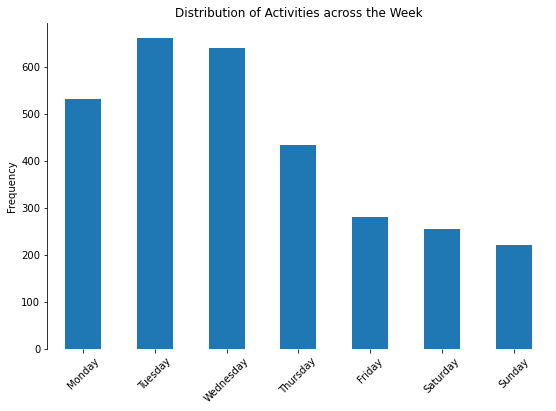

In [72]:
# Number of entries recorded on each day of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data = df["DayOfWeek"].value_counts()


fig, ax = plt.subplots(figsize=(9,6))

data.loc[day_order].plot(kind="bar")
plt.xticks(rotation=45)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title('Distribution of Activities across the Week')
ax.set_ylabel("Frequency")
# ax.set_ylabel('Recorded Activities')

plt.show()

# fig.savefig('Activity-Dist.png',bbox_inches='tight',dpi=300)


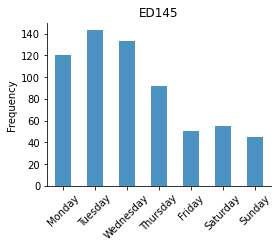

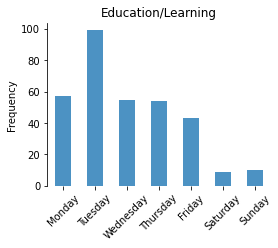

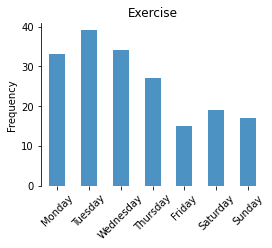

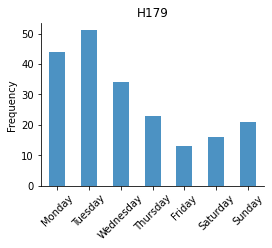

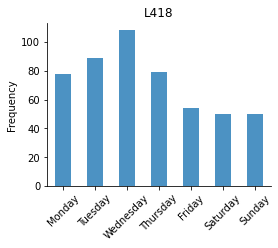

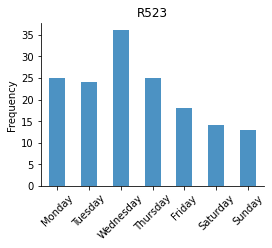

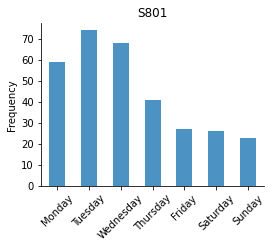

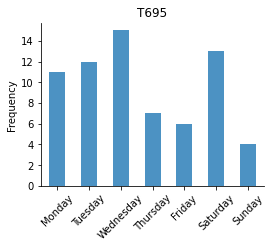

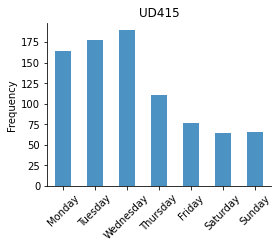

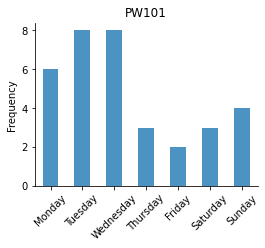

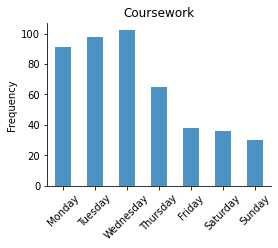

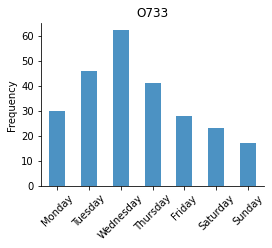

In [73]:
# Distribution of each activity across the week
for code in code_list:
    data = df[(df["PrimaryActivityCode"] == code)|(df["SecondaryActivityCode"] == code)]["DayOfWeek"].value_counts()
#     print(code,"\n",df[df["PrimaryActivityCode"] == code]["DayOfWeek"].value_counts(),"\n")
    fig, ax = plt.subplots(figsize=(4,3))

    data.loc[day_order].plot(kind="bar",alpha=0.8)
    plt.xticks(rotation=45)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_ylabel('Frequency')
    
    if code == "EL642":
        ax.set_title("Education/Learning")
        ax.spines['bottom'].set_visible(False)
#         fig.savefig('EL-Dist.png',bbox_inches='tight',dpi=300)

    elif code == "X893":
        ax.set_title("Exercise")
        ax.spines['bottom'].set_visible(False)
#         fig.savefig('Exercise-Dist.png',bbox_inches='tight',dpi=300)

    elif code == "CW982":
        ax.set_title("Coursework")
#         fig.savefig('CW-Dist.png',bbox_inches='tight',dpi=300)
        
    else:
        ax.set_title(code)
    
    plt.show()



In [74]:
# Start Times for Sleep
time_vals = df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 120)]["StartTime"].unique()

np.sort(time_vals)

array(['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30',
       '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15',
       '03:30', '04:00', '04:15', '04:30', '04:45', '05:30', '06:15',
       '06:45', '11:15', '16:15', '17:45', '20:00', '21:00', '21:30',
       '21:45', '22:00', '22:30', '22:45', '23:00', '23:15', '23:30',
       '23:45'], dtype=object)

In [75]:
# Proportion of Sleep Activities longer than 3 hours (i.e. not 'naps')
print(df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 180)].shape[0]/df[(df["PrimaryActivityCode"] == "S801")].shape[0])

0.7791798107255521


In [76]:
# This block defines a function to determine the average time from a given Series of datetime objects
# Note: will need to specify if the times need to be shifted to account for later times causing undesirable skew
import functools
import operator

def avg_datetime(series,shift=False):
    series = series.apply(lambda x: datetime.strptime(x,'%H:%M'))
    
    if shift:
        test_out = []

        # Shifting times forward by 12 hours (and accouting for times before midnight)
        for time in series:
            mid = datetime.strptime("12:00",'%H:%M')
            if time < mid:
                test_out.append(time + timedelta(hours=12))
            else:
                test_out.append(time - timedelta(hours=12))
                
        series = pd.DataFrame({"test_val":test_out})["test_val"]
        
    dt_min = series.min()
    deltas = [x-dt_min for x in series]
    
    ret = dt_min + functools.reduce(operator.add, deltas) / len(deltas)
    
    if shift:
        ret = ret - timedelta(hours=12)

    return datetime.strftime(ret,'%H:%M')

# print(avg_datetime(df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 180)]["EndTime"]))
# print(avg_datetime(df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 180)]["StartTime"],True))

In [77]:
# Creating vector to hold all times in the day 
all_times = []

all_times.append("00:00")
time = "00:01"

while time != "00:00":
    all_times.append(time)
    time_dt = datetime.strptime(time,'%H:%M')
    new_time_dt = time_dt + timedelta(minutes=1)
    
    time = datetime.strftime(new_time_dt,'%H:%M')

00:24
08:36


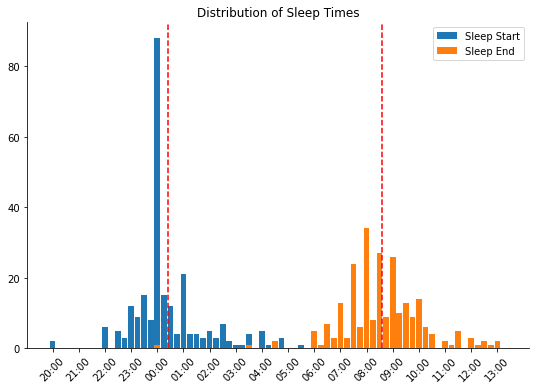

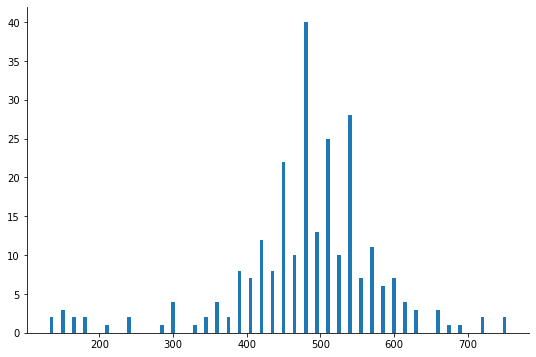

In [78]:
# Start Time Counts for Sleep Activity
# 'Naps' have been excluded by setting a lower bound of 3 hours
time_data_start = df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 180)]["StartTime"].value_counts()
time_data_end = df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 180)]["EndTime"].value_counts()

x_times     = poss_times[80:]+poss_times[:53]
x_times_all = all_times[1200:]+all_times[:795]

vals_to_plt_start = []
vals_to_plt_end = []

for time in x_times_all:
    if time in list(time_data_start.index):
        vals_to_plt_start.append(time_data_start[time])
    else:
        vals_to_plt_start.append(0)
        
    if time in list(time_data_end.index):
        vals_to_plt_end.append(time_data_end[time])
    else:
        vals_to_plt_end.append(0)
        
start_avg = avg_datetime(df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 120)]["StartTime"],True)
end_avg   = avg_datetime(df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 120)]["EndTime"])
print(start_avg)
print(end_avg)

fig, ax = plt.subplots(figsize=(9,6))

plt.bar(x_times_all,vals_to_plt_start,label="Sleep Start",width=13)
plt.bar(x_times_all,vals_to_plt_end,label="Sleep End",width=13)
plt.xticks(x_times[::4],rotation=45)
plt.axvline(x=start_avg,color="red",linestyle="--")
plt.axvline(x=end_avg,color="red",linestyle="--")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Distribution of Sleep Times')
ax.legend()
# ax.set_ylabel('Frequency')

plt.show()



# Plotting the distribution of Sleep Duration (similarly excluding 'naps')
sleep_durs = df[(df["PrimaryActivityCode"] == "S801") & (df["DurationMins"] > 120)]["DurationMins"].value_counts()
fig1, ax1 = plt.subplots(figsize=(9,6))

vals_to_plt_durs = []
for dur in np.sort(sleep_durs.index):
    vals_to_plt_durs.append(sleep_durs[dur])

plt.bar(np.sort(sleep_durs.index),vals_to_plt_durs, width=5)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

In [79]:
test = datetime.strptime("20:00",'%H:%M') + timedelta(hours=4)
print(test)
print(test.day)
print(test - timedelta(hours=24))
print((test - timedelta(hours=24)).day)

1900-01-02 00:00:00
2
1900-01-01 00:00:00
1


In [80]:
# Average Activity Duration
for code in code_list:
    print(code,":",
          df[df["PrimaryActivityCode"] == code]["DurationMins"].sum()/df[df["PrimaryActivityCode"] == code]["DurationMins"].shape[0],"\n")

ED145 : 45.41530944625407 

EL642 : 113.60068259385666 

X893 : 62.96511627906977 

H179 : 38.220338983050844 

L418 : 86.31147540983606 

R523 : 63.50806451612903 

S801 : 400.0788643533123 

T695 : 45.75 

UD415 : 67.34536082474227 

PW101 : 160.58823529411765 

CW982 : 129.78699551569505 

O733 : 37.46666666666667 



In [81]:
# Start Time Counts for Exercise Activity
df[df["PrimaryActivityCode"] == "X893"]["StartTime"].value_counts()

17:00    12
08:00    10
17:15     8
17:30     8
13:00     7
09:30     7
16:00     6
18:00     6
15:15     5
07:30     5
09:00     5
12:00     5
16:30     5
08:30     5
08:15     5
20:00     4
11:00     4
15:00     4
18:30     3
11:30     3
15:30     3
13:45     3
19:00     3
18:15     3
20:15     3
15:45     2
07:00     2
18:45     2
10:30     2
23:15     2
13:30     2
13:15     2
08:45     2
07:15     2
10:45     2
11:15     2
17:45     2
22:15     1
19:30     1
14:30     1
09:15     1
10:15     1
14:00     1
12:30     1
14:45     1
12:15     1
12:45     1
20:45     1
16:15     1
14:15     1
22:45     1
01:00     1
23:45     1
Name: StartTime, dtype: int64

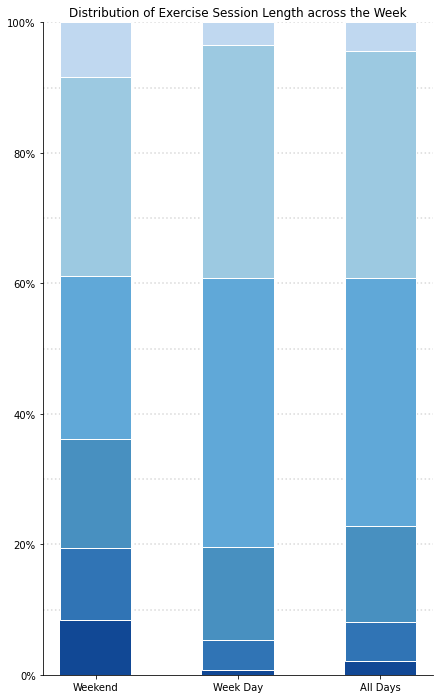

In [82]:
# Producing a plot to be compared to that from the BLS breaking down Exercise Duration
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekend  = ["Saturday","Sunday"]

# Sectioning Exercise Activities into Weekday, Weekend and Whole Week
all_week = df[(df["PrimaryActivityCode"] == "X893") | (df["SecondaryActivityCode"] == "X893")]["DurationMins"].value_counts()
wk_day   = df[((df["PrimaryActivityCode"] == "X893") | (df["SecondaryActivityCode"] == "X893")) & (df["DayOfWeek"].isin(weekdays))]["DurationMins"].value_counts()
wk_end   = df[((df["PrimaryActivityCode"] == "X893") | (df["SecondaryActivityCode"] == "X893")) & (df["DayOfWeek"].isin(weekend))]["DurationMins"].value_counts()

# Label for each bar in the plot
labels   = ["Weekend", "Week Day", "All Days"]

# Extracting the appropriate values from each section
## Initialise vectors to hold data to plot
section1_vals = [0,0,0] #                  x >= 3 hr 
section2_vals = [0,0,0] #  2 hr 59 mins >= x >= 2 hr 
section3_vals = [0,0,0] #  1 hr 59 mins >= x >= 1 hr 30 mins   
section4_vals = [0,0,0] #  1 hr 29 mins >= x >= 1 hr
section5_vals = [0,0,0] #       59 mins >= x >= 30 mins
section6_vals = [0,0,0] #       30 mins >  x

# Build the vectors
for i,section in enumerate([wk_end,wk_day,all_week]):
    for length in section.keys():
        # Increasing the corresponding component of the appropriate section 
        if length >= 3*60:
            section1_vals[i] += section[length]
        elif length >= 2*60:
            section2_vals[i] += section[length]
        elif length >= 1.5*60:
            section3_vals[i] += section[length]
        elif length >= 60:
            section4_vals[i] += section[length]
        elif length >= 30:
            section5_vals[i] += section[length]
        else:
            section6_vals[i] += section[length]
    
    for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
        # Standardising the total count for each sub-section
        subsect[i] *= 100/section.sum()
        
# Check - Passed
# check = [0,0,0]

# for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
#     print(subsect)
#     for i,val in enumerate(subsect):
#         check[i] += val
#     print("    ",check)

# print(check)

# Height of each column at each 'step'
step1 = np.add(section1_vals, section2_vals).tolist()
step2 = np.add(step1, section3_vals).tolist()
step3 = np.add(step2, section4_vals).tolist()
step4 = np.add(step3, section5_vals).tolist()

# Producing plot
fig, ax = plt.subplots(figsize=(7,12))
cwidth = 0.5

ax.bar(labels, section1_vals, color = "#114895", width = cwidth, label='Over 3 hrs ')
ax.bar(labels, section2_vals, edgecolor = 'white', color = "#3074b5", bottom = section1_vals, width = cwidth, label='2 hrs - 3 hrs')
ax.bar(labels, section3_vals, edgecolor = 'white', color = "#4890c0", bottom = step1, width = cwidth, label='1.5 hrs - 2 hrs')
ax.bar(labels, section4_vals, edgecolor = 'white', color = "#60a8d8", bottom = step2, width = cwidth, label='1 hr - 1.5 hrs')
ax.bar(labels, section5_vals, edgecolor = 'white', color = "#9cc9e1", bottom = step3, width = cwidth, label='30 - 59 mins')
ax.bar(labels, section6_vals, edgecolor = 'white', color = "#c0d8f0", bottom = step4, width = cwidth, label='Under 30 mins')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0,100])

ax.set_title("Distribution of Exercise Session Length across the Week", fontsize=12)

# Handling the legend - not necessary, since the diagram matches the other; remove chart junk
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size':12})

# Change y-axis labels to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add horizontal lines from each y-tick
for tick in list(range(0,101,10)):
    if tick == 0:
        continue
    ax.axhline(tick, linestyle = "dotted", color = "grey", alpha = 0.3, zorder = 0)


plt.show()

# fig.savefig('ExLenDist.png',bbox_inches='tight',dpi=300)

In [83]:
df[((df["PrimaryActivityCode"] == "X893") | (df["SecondaryActivityCode"] == "X893"))]["DescriptiveLabel"].value_counts()

Exercise                 21
Walk                     16
Walking                  12
Workout                   6
Running                   5
                         ..
Walk dogs                 1
Walk/Sit in Park          1
Upper body training       1
Running and Audiobook     1
Running                   1
Name: DescriptiveLabel, Length: 63, dtype: int64

In [84]:
# Exploring Exercise Activities by Description
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize as word_tokenise
import string
import re # Regular expression library

ps = PorterStemmer()
desc_counts   = df[((df["PrimaryActivityCode"] == "X893") | (df["SecondaryActivityCode"] == "X893"))]["DescriptiveLabel"].value_counts()
exercise_dict = {}
for desc in list(desc_counts.keys()):
        
    # Accounting for a few user errors
    if desc == "do exercise ":
        desc2 = "exercise".lower()
    if desc == "Running ":
        desc2 = "running".lower()
    elif desc == "joggong":
        desc2 = "jogging".lower()
    elif desc == "Workout":
        desc2 = "work out".lower()
    elif desc == "Run.":
        desc2 = "run"
#     elif desc == "Bike Ride":
#         desc2 = "biking"
    else:
        #Removing any punctuation and making lowercase
        desc2 = re.sub('['+string.punctuation+']',' ',desc).lower()
    desc_stem = ps.stem(desc2)
#     print([a.lower() for a in exercise_dict.keys()])
#     print(desc_stem)

    key_comp = [ps.stem(a.lower()) for a in exercise_dict.keys()]
#     print(key_comp)
    
    if len(word_tokenise(desc_stem)) == 1:
        if desc_stem in exercise_dict.keys():
            exercise_dict[desc_stem] += desc_counts[desc]
        elif desc_stem in key_comp:
            exercise_dict[list(exercise_dict.keys())[key_comp.index(desc_stem)]] += desc_counts[desc]
        elif desc2 in exercise_dict.keys():
            exercise_dict[desc2] += desc_counts[desc]
        else:
            exercise_dict[desc] = desc_counts[desc]
    else:
        if all([ps.stem(word) not in key_comp for word in word_tokenise(desc_stem)]):
#             print(desc)
#             print(desc2)
#             print(desc_stem)
#             print(word_tokenise(desc_stem))
#             print(key_comp)
#             print([ps.stem(word) not in key_comp for word in word_tokenise(desc_stem)])
            exercise_dict[desc] = desc_counts[desc]
        else:
            for word in word_tokenise(desc_stem):
                if ps.stem(word) in exercise_dict.keys():
                    exercise_dict[word] += desc_counts[desc]
                    break
                elif ps.stem(word) in key_comp:
                    exercise_dict[list(exercise_dict.keys())[key_comp.index(ps.stem(word))]] += desc_counts[desc]
                    break
                elif desc2 in exercise_dict.keys():
                    exercise_dict[desc2] += desc_counts[desc]
                    break
                else:
                    pass

exercise_dict

{'Exercise': 29,
 'Walk': 51,
 'Workout': 8,
 'Running': 21,
 'Bike Ride': 3,
 'Jog': 6,
 'Outdoor activity': 2,
 'Swimming': 2,
 'Yoga': 4,
 'Cardio with music': 1,
 'Gym time': 1,
 'Roller skating and music': 1,
 'Cardio day': 1,
 'doing sports': 1,
 'Food shop': 1,
 'Long Hike': 1,
 'Kitchen needed some cleaning': 1,
 'Working out': 1,
 'Bike ridding': 1,
 'Bodyweight': 1,
 'Play frisbee in the park.': 1,
 'Dancing': 1,
 'Upper body training': 1}

In [85]:
# Displaying the top 5 Descriptive Labels for exercise activities
for i,(val,act) in enumerate(sorted([(b,a) for (a,b) in exercise_dict.items()],reverse=True)):
    if i < 5:
        print(act," -", round(val*100/np.sum(list(exercise_dict.values())),2))

Walk  - 36.43
Exercise  - 20.71
Running  - 15.0
Workout  - 5.71
Jog  - 4.29


In [86]:
ps = PorterStemmer()

test = word_tokenise(ps.stem("going for a walk"))
print(ps.stem("exercis"))
comp = ['going','for','a','walk','outside']
all([word in comp for word in test])

exerci


True

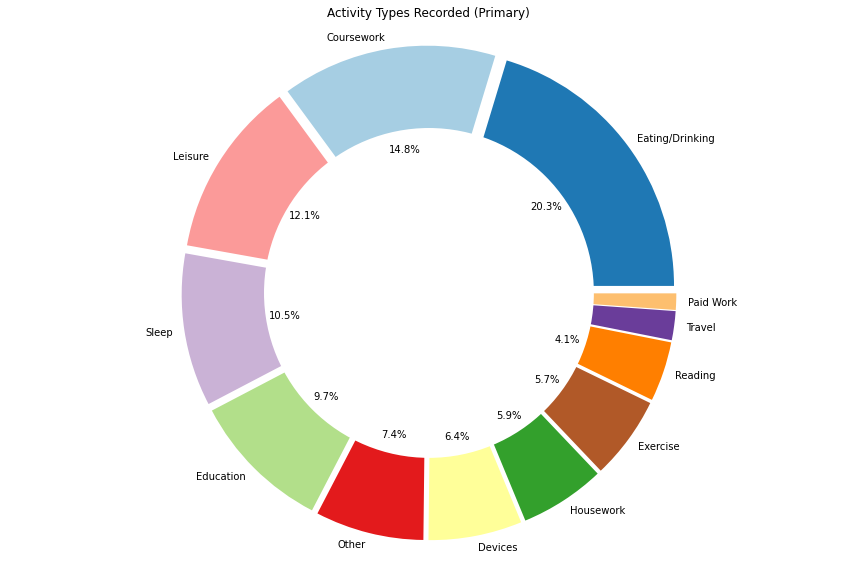

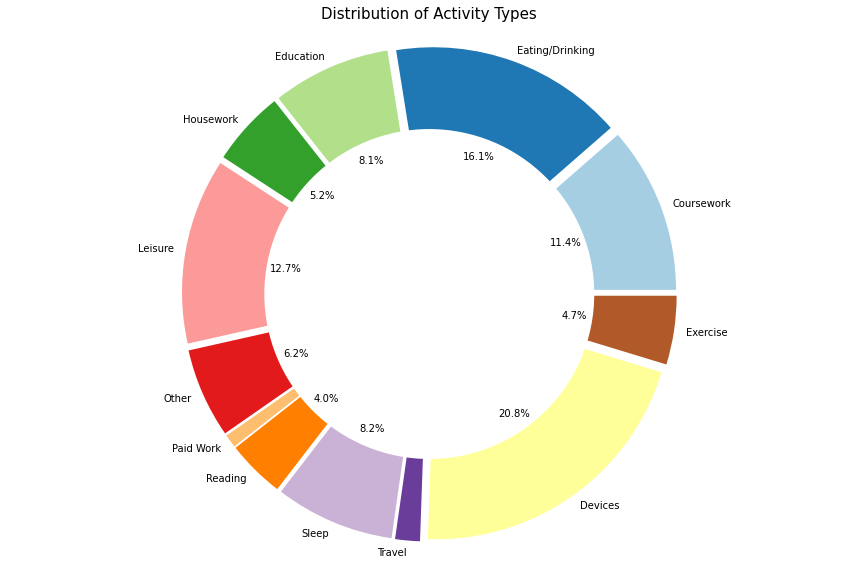

In [97]:
# Frequency of each activity recorded
act_counts1 = df["PrimaryActivityCode"].value_counts()
act_counts2 = df["PrimaryActivityCode"].value_counts() + df["SecondaryActivityCode"].value_counts()

labs = {"CW982":"Coursework","ED145":"Eating/Drinking","EL642":"Education","H179":"Housework","L418":"Leisure",
        "O733":"Other","PW101":"Paid Work","R523":"Reading","S801":"Sleep","T695":"Travel","UD415":"Devices","X893":"Exercise"}

cols = {"CW982":"#8DD3C7", "ED145":"#FFFFB3","EL642":"#BEBADA","H179":"#FB8072", "L418":"#80B1D3", "O733":"#FDB462",
        "PW101":"#B3DE69", "R523":"#FCCDE5", "S801":"#D9D9D9", "T695":"#BC80BD", "UD415":"#CCEBC5", "X893":"#FFED6F"}

# Alternate colour scheme (chosen scheme)
co1s = {"CW982":"#A6CEE3", "ED145":"#1F78B4","EL642":"#B2DF8A","H179":"#33A02C", "L418":"#FB9A99", "O733":"#E31A1C",
        "PW101":"#FDBF6F", "R523":"#FF7F00", "S801":"#CAB2D6", "T695":"#6A3D9A", "UD415":"#FFFF99", "X893":"#B15928"}

# Setting the minimum percentage to display
def my_autopct(pct):
    return ('%.1f%%' % pct) if pct > 3.5 else ''

# Creating vectors to hold the labels/colours in the correct order
x_cols1 = []
x_labs1 = []
x_cols2 = []
x_labs2 = []

for code in act_counts1.keys():
    x_labs1.append(labs[code])
    x_cols1.append(co1s[code])
    
for code in act_counts2.keys():
    x_labs2.append(labs[code])
    x_cols2.append(co1s[code])

pie, ax = plt.subplots(figsize=[12,8])
labels = x_labs1
plt.pie(x=act_counts1, explode=[0.05]*12,colors=x_cols1, labels=labels,labeldistance=1.05,autopct=my_autopct,pctdistance=0.57)
plt.title("Activity Types Recorded (Primary)")

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


pie2, ax2 = plt.subplots(figsize=[12,8])
labels = x_labs2
plt.pie(x=act_counts2, explode=[0.05]*12,colors=x_cols2, labels=labels,labeldistance=1.05,autopct=my_autopct,pctdistance=0.57)
plt.title("Distribution of Activity Types",fontsize=15)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

# pie2.savefig('ActTyp-Dist.png',bbox_inches='tight',dpi=300)


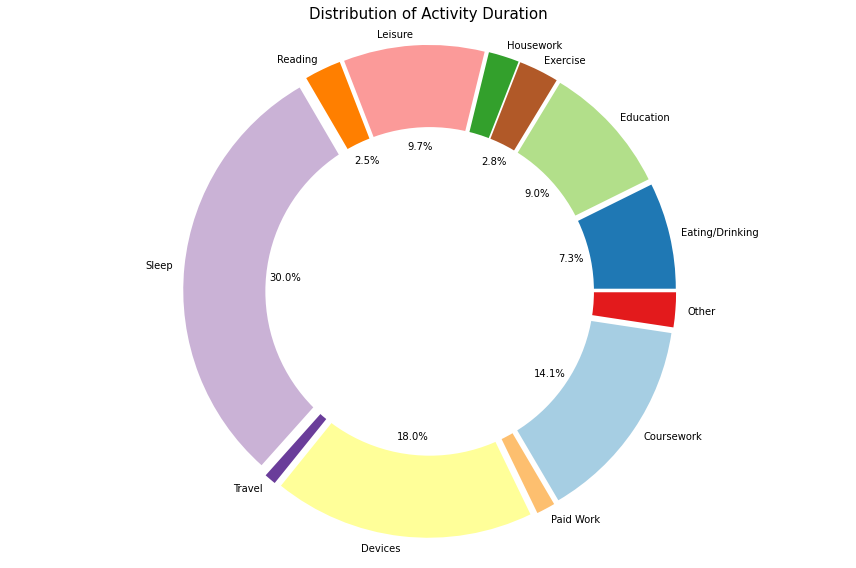

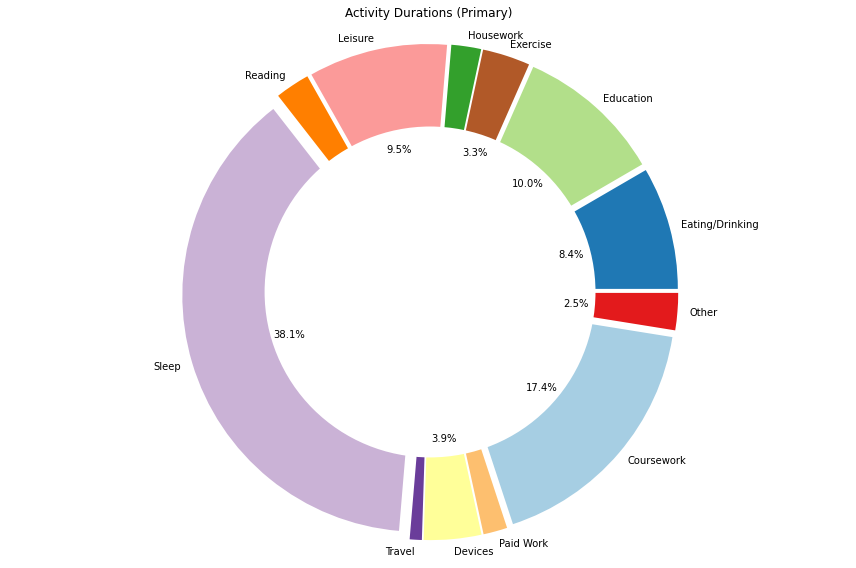

In [99]:
# Similar Pie Chart but this time shown by duration of activities

# Creating vector holding total duration for each activity with the same code assigned
act_times = []
for code in code_list:
    act_times.append(df[(df["PrimaryActivityCode"] == code)|(df["SecondaryActivityCode"] == code)]["DurationMins"].sum())

# Creating vectors to hold the labels/colours in the correct order
x_labs3 = []
x_cols3 = []
for code in code_list:
    x_labs3.append(labs[code])
    x_cols3.append(co1s[code])
    
# Setting the minimum percentage to display
def my_autopct2(pct):
    return ('%.1f%%' % pct) if pct > 2.4 else ''

pie, ax = plt.subplots(figsize=[12,8])
labels = x_labs3
plt.pie(x=act_times, explode=[0.05]*12,colors=x_cols3, labels=labels,labeldistance=1.05,autopct=my_autopct2,pctdistance=0.57)
plt.title("Distribution of Activity Duration", fontsize=15)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()

# pie.savefig('ActDur-Dist.png',bbox_inches='tight',dpi=300)


# Same graph - isolating only Primary Activity Codes
act_times2 = []
for code in code_list:
    act_times2.append(df[df["PrimaryActivityCode"] == code]["DurationMins"].sum())
    
pie2, ax2 = plt.subplots(figsize=[12,8])
labels = x_labs3
plt.pie(x=act_times2, explode=[0.05]*12,colors=x_cols3, labels=labels,labeldistance=1.05,autopct=my_autopct2,pctdistance=0.57)
plt.title("Activity Durations (Primary Code Only)")

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()


In [89]:
# Longest Activity Logged of each type
for code in code_list:
    print(code,":",df[df["PrimaryActivityCode"] == code]["DurationMins"].max(),"\n")

ED145 : 495.0 

EL642 : 510.0 

X893 : 330.0 

H179 : 120.0 

L418 : 600.0 

R523 : 240.0 

S801 : 750.0 

T695 : 195.0 

UD415 : 360.0 

PW101 : 600.0 

CW982 : 390.0 

O733 : 270.0 



#### The following blocks apply method used to breakdown session times for exercise, but for CW sessions and CW/Work Sessions

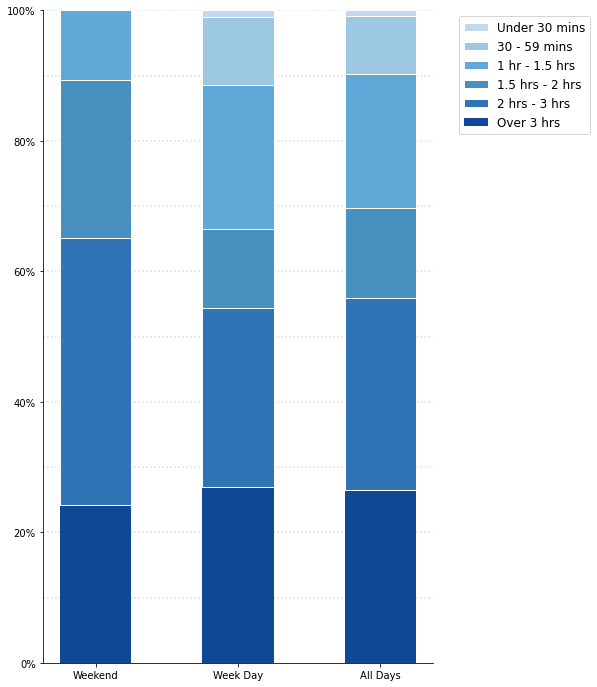

In [90]:
# Producing a plot breaking down CW Session Duration
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekend  = ["Saturday","Sunday"]

# Sectioning Exercise Activities into Weekday, Weekend and Whole Week
all_week = df[(df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982")]["DurationMins"].value_counts()
wk_day   = df[((df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982")) & (df["DayOfWeek"].isin(weekdays))]["DurationMins"].value_counts()
wk_end   = df[((df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982")) & (df["DayOfWeek"].isin(weekend))]["DurationMins"].value_counts()

# Label for each bar in the plot
labels   = ["Weekend", "Week Day", "All Days"]

# Extracting the appropriate values from each section
## Initialise vectors to hold data to plot
section1_vals = [0,0,0] #                  x >= 3 hr 
section2_vals = [0,0,0] #  2 hr 59 mins >= x >= 2 hr 
section3_vals = [0,0,0] #  1 hr 59 mins >= x >= 1 hr 30 mins   
section4_vals = [0,0,0] #  1 hr 29 mins >= x >= 1 hr
section5_vals = [0,0,0] #       59 mins >= x >= 30 mins
section6_vals = [0,0,0] #       30 mins >  x

# Build the vectors
for i,section in enumerate([wk_end,wk_day,all_week]):
    for length in section.keys():
        # Increasing the corresponding component of the appropriate section 
        if length >= 3*60:
            section1_vals[i] += section[length]
        elif length >= 2*60:
            section2_vals[i] += section[length]
        elif length >= 1.5*60:
            section3_vals[i] += section[length]
        elif length >= 60:
            section4_vals[i] += section[length]
        elif length >= 30:
            section5_vals[i] += section[length]
        else:
            section6_vals[i] += section[length]
    
    for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
        # Standardising the total count for each sub-section
        subsect[i] *= 100/section.sum()
        
# Check - Passed
# check = [0,0,0]

# for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
#     print(subsect)
#     for i,val in enumerate(subsect):
#         check[i] += val
#     print("    ",check)

# print(check)

# Height of each column at each 'step'
step1 = np.add(section1_vals, section2_vals).tolist()
step2 = np.add(step1, section3_vals).tolist()
step3 = np.add(step2, section4_vals).tolist()
step4 = np.add(step3, section5_vals).tolist()

# Producing plot
fig, ax = plt.subplots(figsize=(7,12))
cwidth = 0.5

ax.bar(labels, section1_vals, color = "#114895", width = cwidth, label='Over 3 hrs ')
ax.bar(labels, section2_vals, edgecolor = 'white', color = "#3074b5", bottom = section1_vals, width = cwidth, label='2 hrs - 3 hrs')
ax.bar(labels, section3_vals, edgecolor = 'white', color = "#4890c0", bottom = step1, width = cwidth, label='1.5 hrs - 2 hrs')
ax.bar(labels, section4_vals, edgecolor = 'white', color = "#60a8d8", bottom = step2, width = cwidth, label='1 hr - 1.5 hrs')
ax.bar(labels, section5_vals, edgecolor = 'white', color = "#9cc9e1", bottom = step3, width = cwidth, label='30 - 59 mins')
ax.bar(labels, section6_vals, edgecolor = 'white', color = "#c0d8f0", bottom = step4, width = cwidth, label='Under 30 mins')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0,100])

# Handling the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size':12})

# Change y-axis labels to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add horizontal lines from each y-tick
for tick in list(range(0,101,10)):
    if tick == 0:
        continue
    ax.axhline(tick, linestyle = "dotted", color = "grey", alpha = 0.3, zorder = 0)

# Add title
ax.set_title("Distribution of CW Session Length across the Week", fontsize=12)

plt.show()

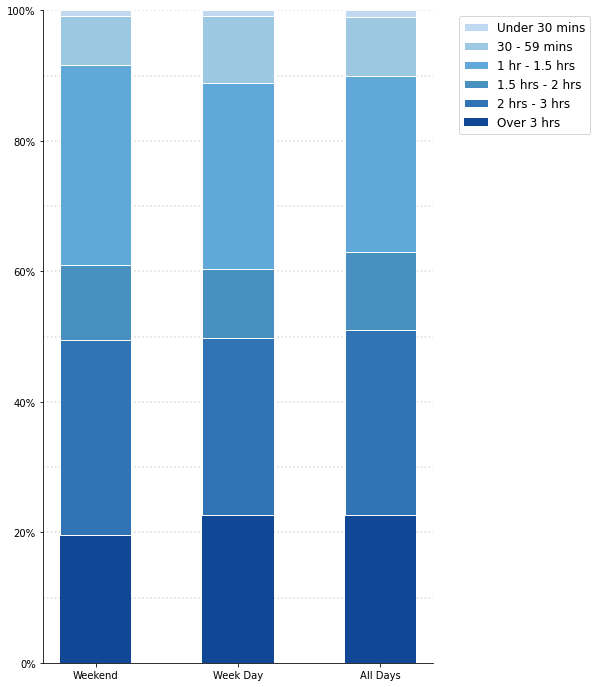

In [91]:
# Producing a plot breaking down CW/Study Session Duration
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekend  = ["Saturday","Sunday"]

# Sectioning Exercise Activities into Weekday, Weekend and Whole Week
all_week = df[((df["PrimaryActivityCode"] == "EL642") | (df["SecondaryActivityCode"] == "EL642")) | ((df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982"))]["DurationMins"].value_counts()
wk_day   = df[(((df["PrimaryActivityCode"] == "EL642") | (df["SecondaryActivityCode"] == "EL642")) | ((df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982"))) & (df["DayOfWeek"].isin(weekdays))]["DurationMins"].value_counts()
wk_end   = df[(((df["PrimaryActivityCode"] == "EL642") | (df["SecondaryActivityCode"] == "EL642"))) | ((df["PrimaryActivityCode"] == "CW982") | (df["SecondaryActivityCode"] == "CW982")) & (df["DayOfWeek"].isin(weekend))]["DurationMins"].value_counts()

# Label for each bar in the plot
labels   = ["Weekend", "Week Day", "All Days"]

# Extracting the appropriate values from each section
## Initialise vectors to hold data to plot
section1_vals = [0,0,0] #                  x >= 3 hr 
section2_vals = [0,0,0] #  2 hr 59 mins >= x >= 2 hr 
section3_vals = [0,0,0] #  1 hr 59 mins >= x >= 1 hr 30 mins   
section4_vals = [0,0,0] #  1 hr 29 mins >= x >= 1 hr
section5_vals = [0,0,0] #       59 mins >= x >= 30 mins
section6_vals = [0,0,0] #       30 mins >  x

# Build the vectors
for i,section in enumerate([wk_end,wk_day,all_week]):
    for length in section.keys():
        # Increasing the corresponding component of the appropriate section 
        if length >= 3*60:
            section1_vals[i] += section[length]
        elif length >= 2*60:
            section2_vals[i] += section[length]
        elif length >= 1.5*60:
            section3_vals[i] += section[length]
        elif length >= 60:
            section4_vals[i] += section[length]
        elif length >= 30:
            section5_vals[i] += section[length]
        else:
            section6_vals[i] += section[length]
    
    for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
        # Standardising the total count for each sub-section
        subsect[i] *= 100/section.sum()
        
# Check - Passed
# check = [0,0,0]

# for subsect in [section1_vals,section2_vals,section3_vals,section4_vals,section5_vals,section6_vals]:
#     print(subsect)
#     for i,val in enumerate(subsect):
#         check[i] += val
#     print("    ",check)

# print(check)

# Height of each column at each 'step'
step1 = np.add(section1_vals, section2_vals).tolist()
step2 = np.add(step1, section3_vals).tolist()
step3 = np.add(step2, section4_vals).tolist()
step4 = np.add(step3, section5_vals).tolist()

# Producing plot
fig, ax = plt.subplots(figsize=(7,12))
cwidth = 0.5

ax.bar(labels, section1_vals, color = "#114895", width = cwidth, label='Over 3 hrs ')
ax.bar(labels, section2_vals, edgecolor = 'white', color = "#3074b5", bottom = section1_vals, width = cwidth, label='2 hrs - 3 hrs')
ax.bar(labels, section3_vals, edgecolor = 'white', color = "#4890c0", bottom = step1, width = cwidth, label='1.5 hrs - 2 hrs')
ax.bar(labels, section4_vals, edgecolor = 'white', color = "#60a8d8", bottom = step2, width = cwidth, label='1 hr - 1.5 hrs')
ax.bar(labels, section5_vals, edgecolor = 'white', color = "#9cc9e1", bottom = step3, width = cwidth, label='30 - 59 mins')
ax.bar(labels, section6_vals, edgecolor = 'white', color = "#c0d8f0", bottom = step4, width = cwidth, label='Under 30 mins')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([0,100])

# Handling the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size':12})

# Change y-axis labels to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add horizontal lines from each y-tick
for tick in list(range(0,101,10)):
    if tick == 0:
        continue
    ax.axhline(tick, linestyle = "dotted", color = "grey", alpha = 0.3, zorder = 0)

# Add title
ax.set_title("Distribution of CW and Study Session Length across the Week", fontsize=12)

plt.show()

In [92]:
ud1 = df[(df["PrimaryActivityCode"] == "UD415") & (df["SecondaryActivityCode"] != "UD415")]["SecondaryActivityCode"].value_counts()
ud2 = df[(df["SecondaryActivityCode"] == "UD415") & (df["PrimaryActivityCode"] != "UD415")]["PrimaryActivityCode"].value_counts()

print(ud1,"\n")
print(ud2)

L418     55
CW982     4
O733      4
R523      2
EL642     2
Name: SecondaryActivityCode, dtype: int64 

L418     182
CW982    156
EL642    152
ED145     72
R523      26
X893      21
O733      14
H179      12
PW101      9
T695       6
S801       3
Name: PrimaryActivityCode, dtype: int64


In [93]:
ud = {}
for key in list(ud2.keys()):
    if key in list(ud1.keys()):
        ud[key] = ud1[key] + ud2[key]
        
    else:
        ud[key] = ud2[key]
        
print(ud)

{'L418': 237, 'CW982': 160, 'EL642': 154, 'ED145': 72, 'R523': 28, 'X893': 21, 'O733': 18, 'H179': 12, 'PW101': 9, 'T695': 6, 'S801': 3}


In [94]:
ud.values()

dict_values([237, 160, 154, 72, 28, 21, 18, 12, 9, 6, 3])

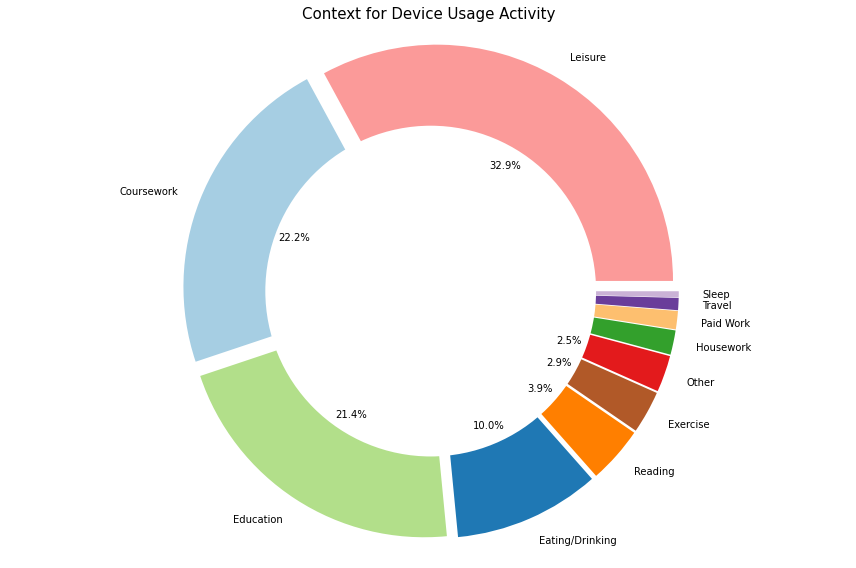

In [95]:
pie, ax = plt.subplots(figsize=[12,8])

# Creating vectors to hold the labels/colours in the correct order
x_labs4 = []
x_cols4 = []
for code in ud.keys():
    x_labs4.append(labs[code])
    x_cols4.append(co1s[code])

labels = x_labs4
plt.pie(x=ud.values(), explode=[0.05]*len(x_labs4),colors=x_cols4, labels=labels,labeldistance=1.1,autopct=my_autopct2,pctdistance=0.57)
plt.title("Context for Device Usage Activity", fontsize=15)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()

# pie.savefig('DevCon-Dist.png',bbox_inches='tight',dpi=300)
